In [220]:
from optiwindnet.api import WindFarmNetwork, Heuristic, MILP
import numpy as np

In [221]:
# data
cables = [(None, 3, 206), (None, 5, 287), (None, 7, 406)]

substations = np.array([[696, 1063],], dtype=float)
turbines = np.array(
    [[1940, 279], [1920, 703], [1475, 696], [1839, 1250],
     [1277, 1296], [442, 1359], [737, 435], [1060, 26],
     [522, 176], [87, 35], [184, 417], [71, 878]],
    dtype=float
)
border = np.array( # vertices oriented counter-clockwise
    [[1951, 200], [1951, 1383], [386, 1383], [650, 708], [624, 678],
     [4, 1036], [4, 3], [1152, 3], [917, 819], [957, 854]],
    dtype=float)
# 'obstacles' is an optional location attribute
obstacles = [
    # - vertices oriented clockwise for each obstacle polygon
    # - obstacles must be strictly inside the extents polygon
    # - undefined behavior if obstacles and extents borders overlap
    # first obstacle
    np.array([[1540, 920], [1600, 940], [1600, 1150], [1400, 1200]]),
    # [second obstacle] ...
]

<Axes: >

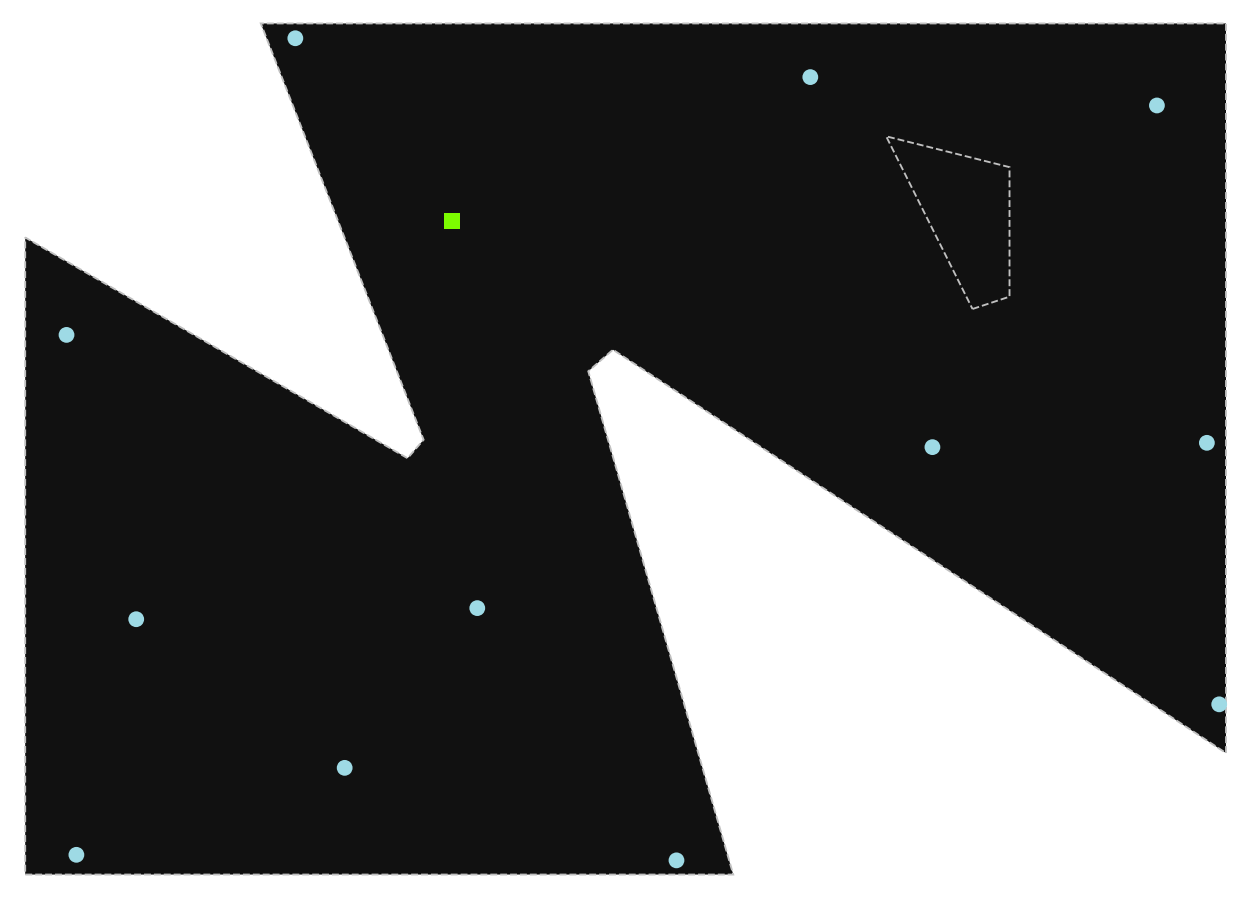

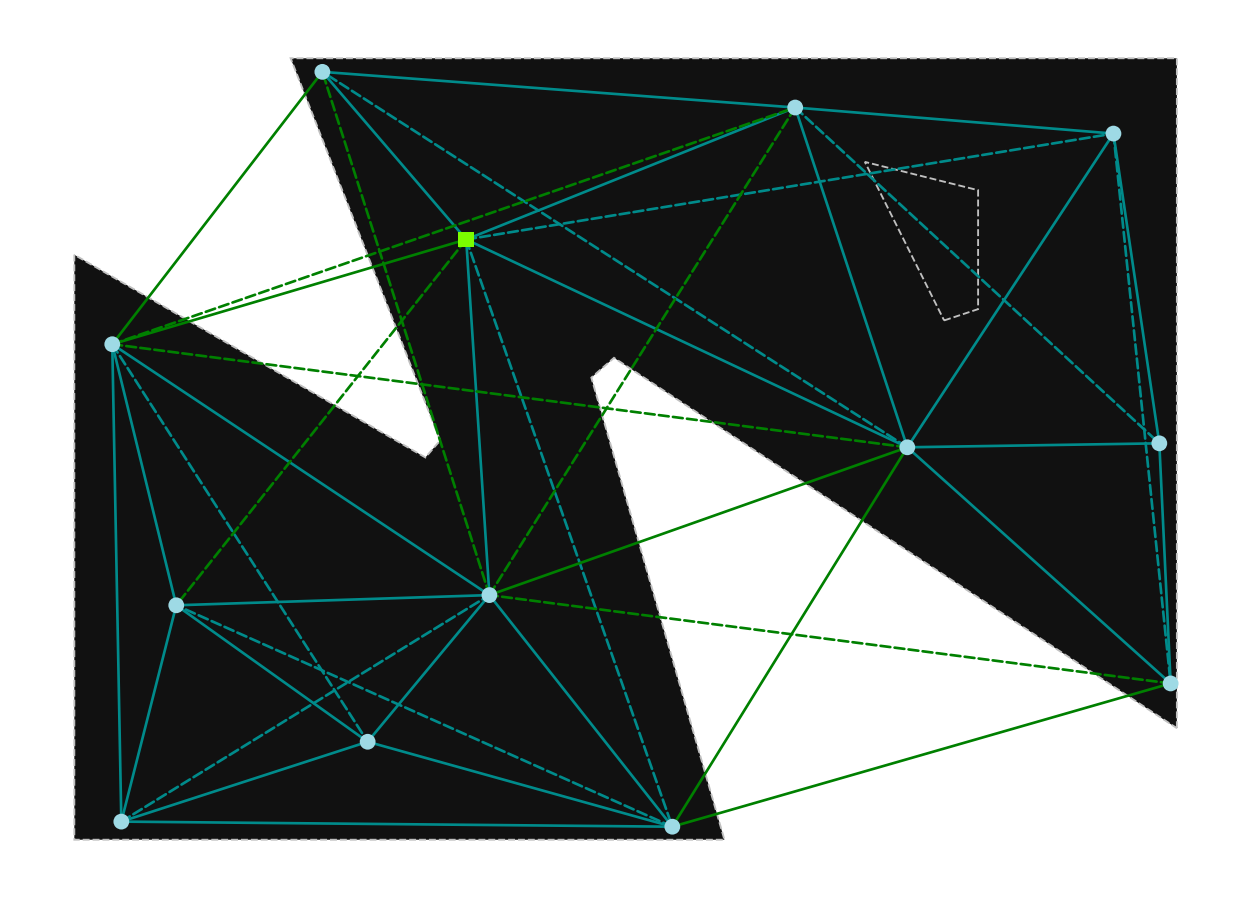

In [222]:
# create wfn from coordinates
wfn = WindFarmNetwork(turbines=turbines, substations=substations, border=border, obstacles=obstacles, cables=cables,)
wfn.plot_L()
wfn.plot_A()


In [223]:
# initialize the Heuristic router
router = Heuristic(wfn=wfn, solver='EW') # default is EW

In [ ]:
# Run optimization
router()
# router should return array tree

S, G_tentative, and G got updated!


<Axes: >

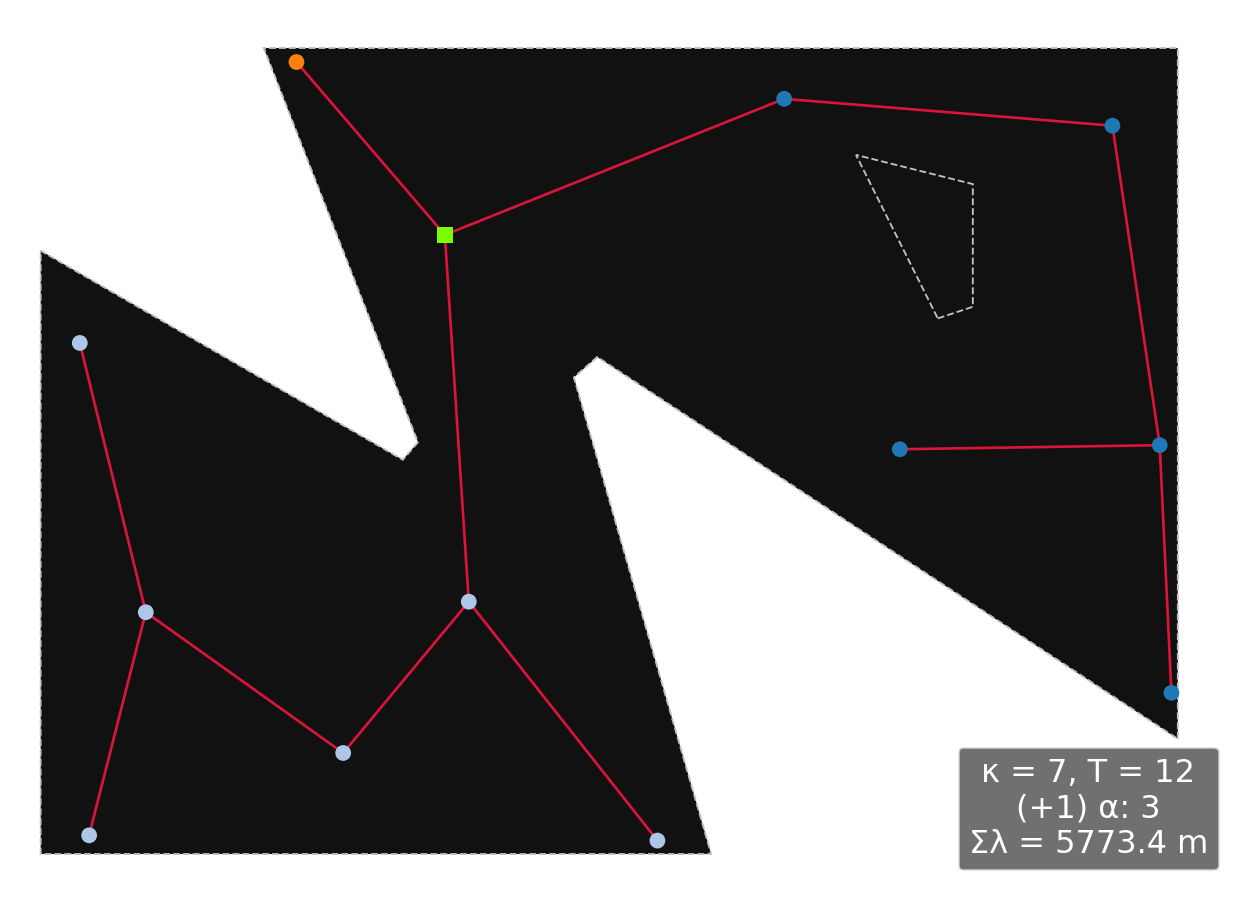

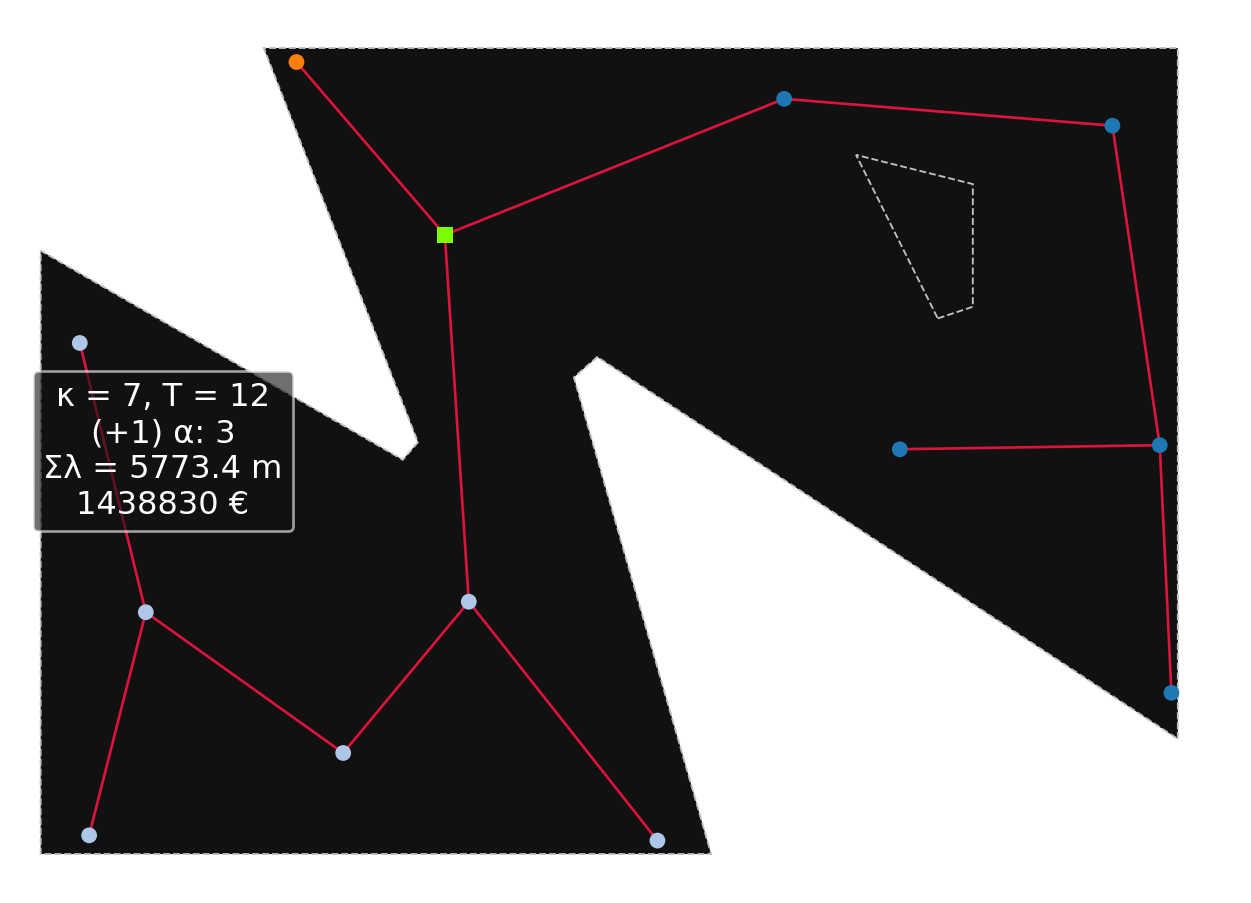

In [225]:
wfn.plot_G_tentative()
wfn.plot()

S, G_tentative, and G got updated!
G_tentative is not updated


<Axes: >

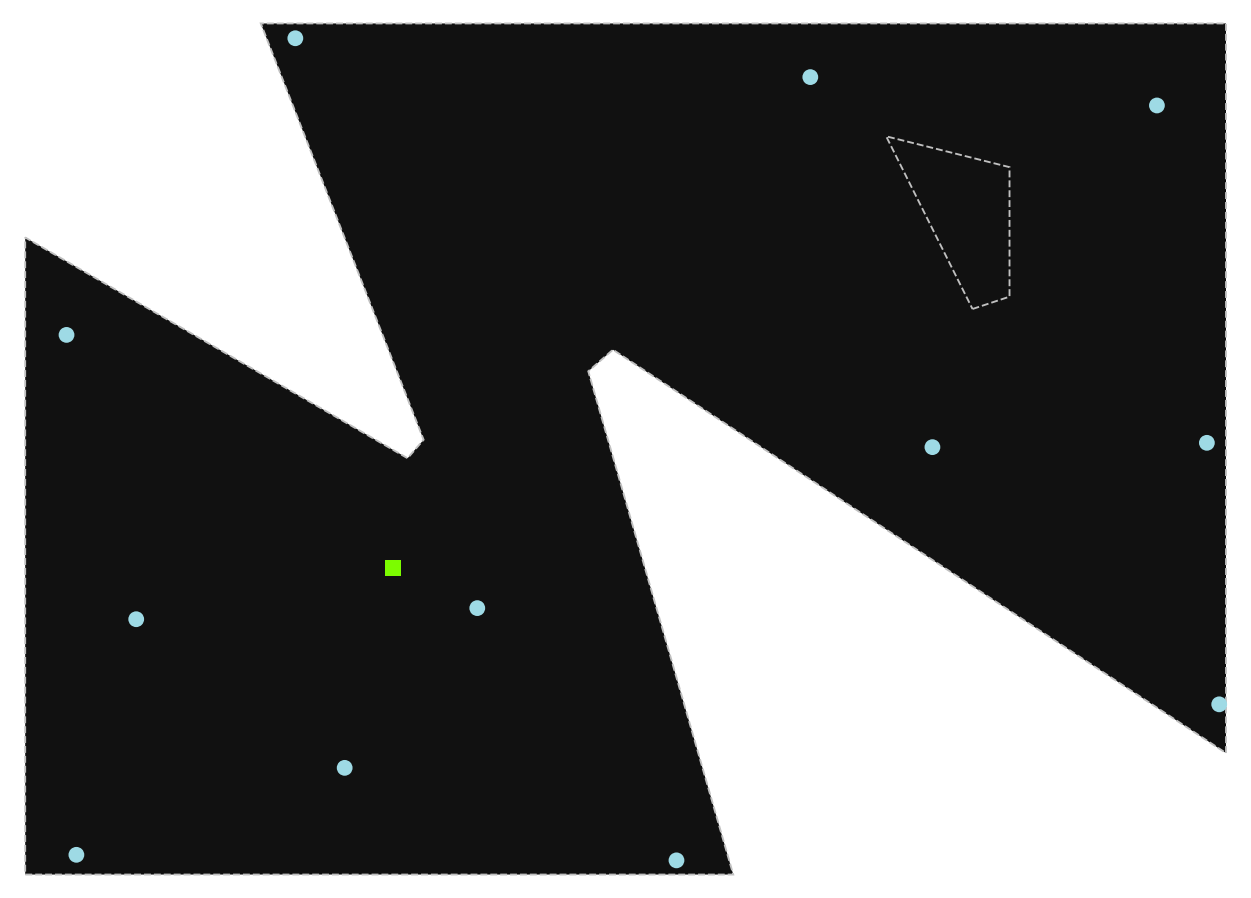

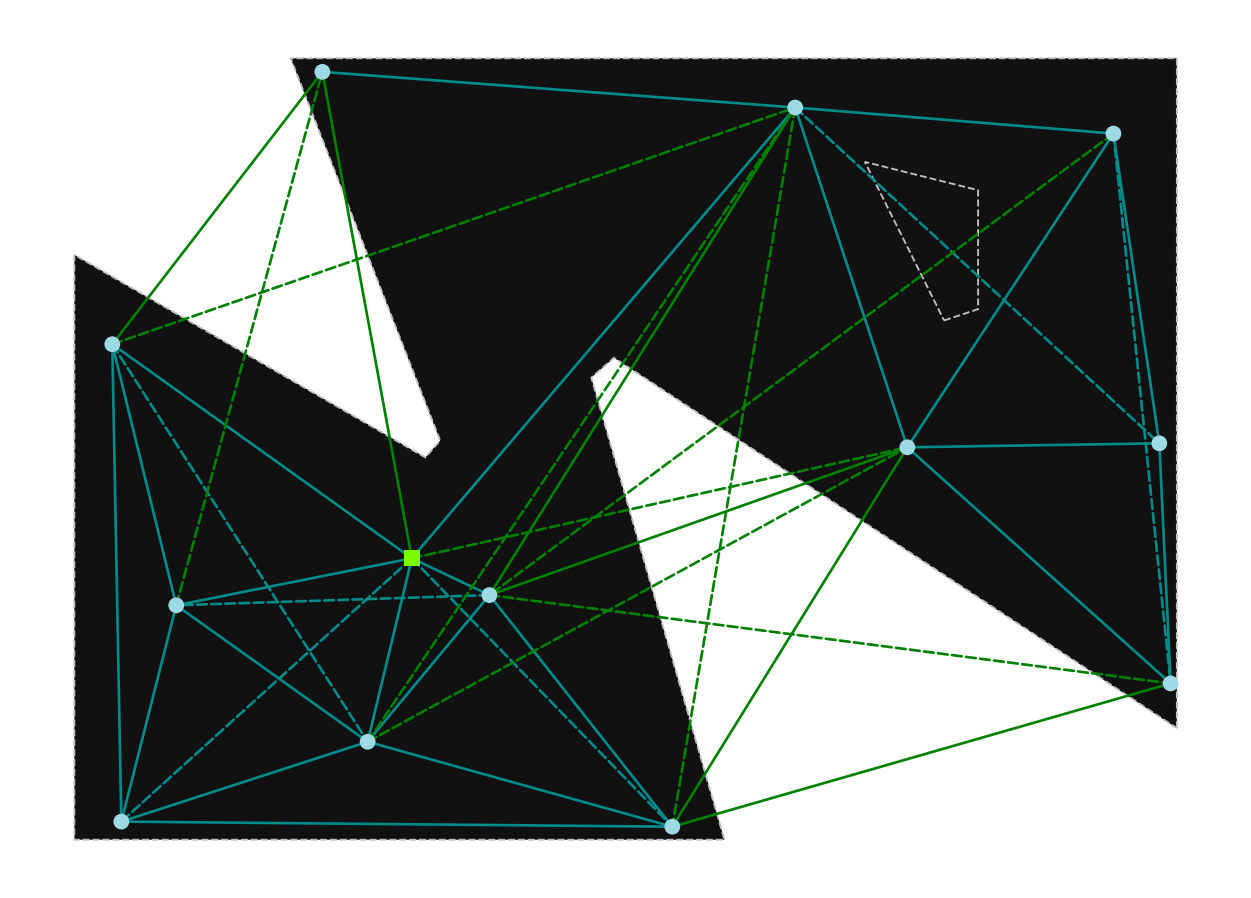

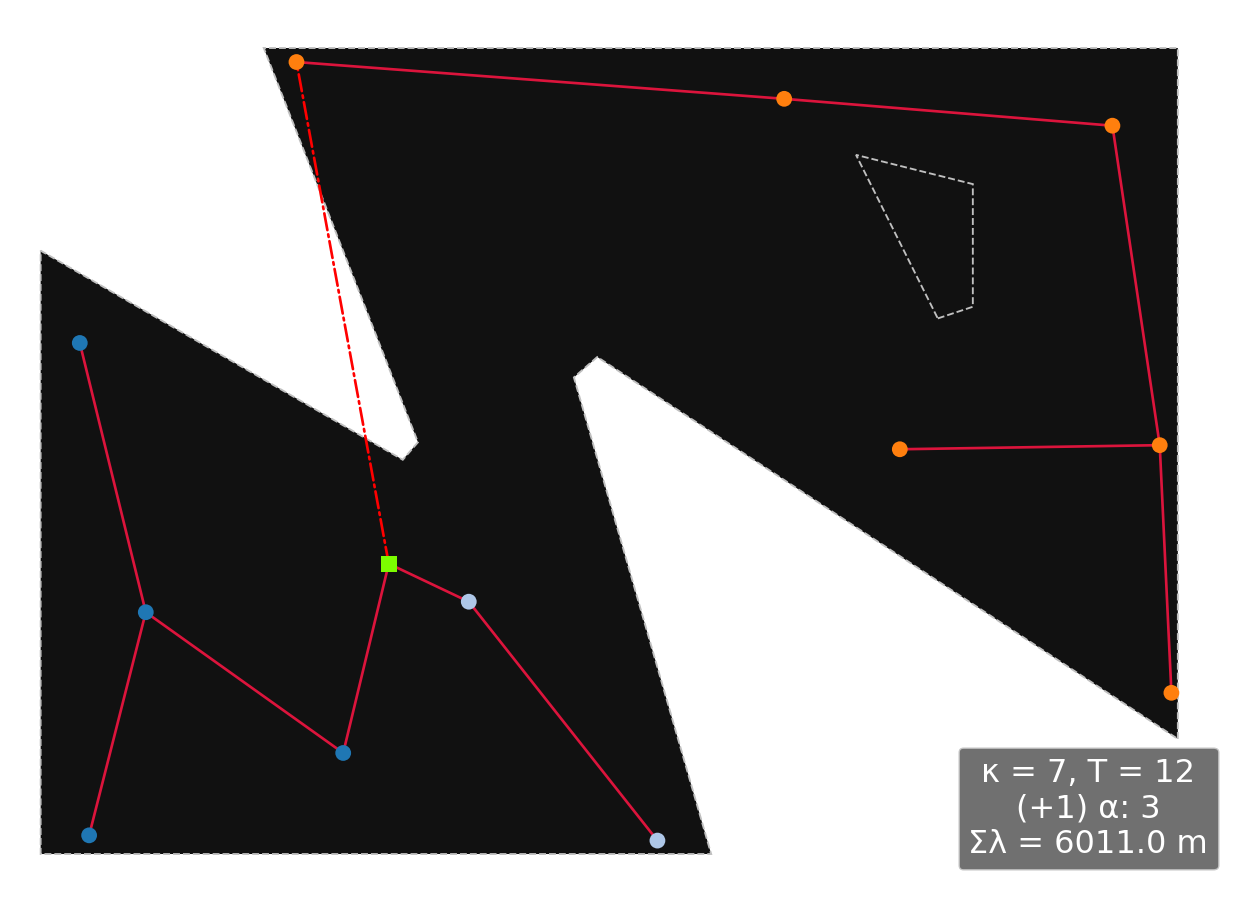

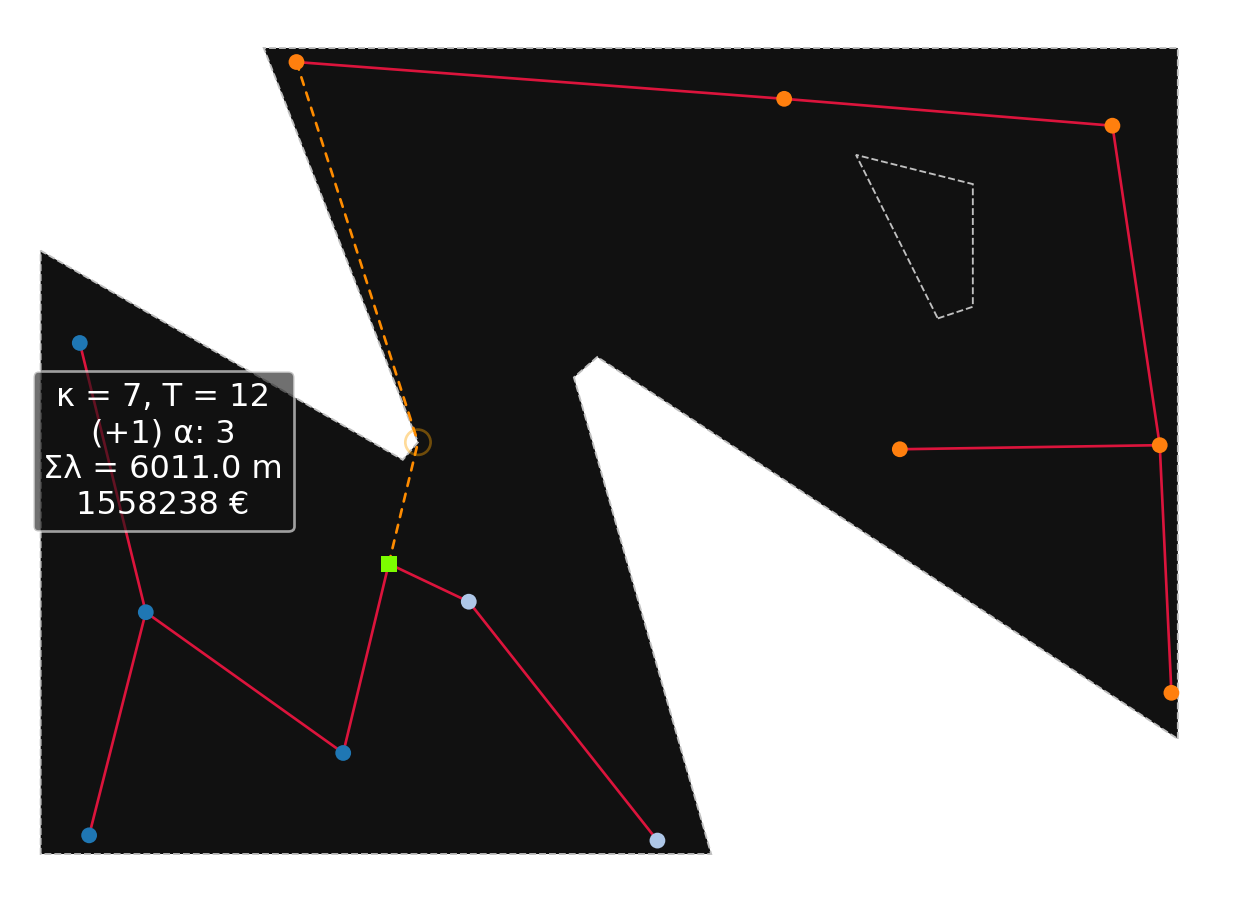

In [226]:
# set coordinate from the router
new_substations = np.array([[600, 500],], dtype=float)
router(turbines=turbines, substations=new_substations)
wfn.plot_L()
wfn.plot_A()
wfn.plot_G_tentative()
wfn.plot()

<Axes: >

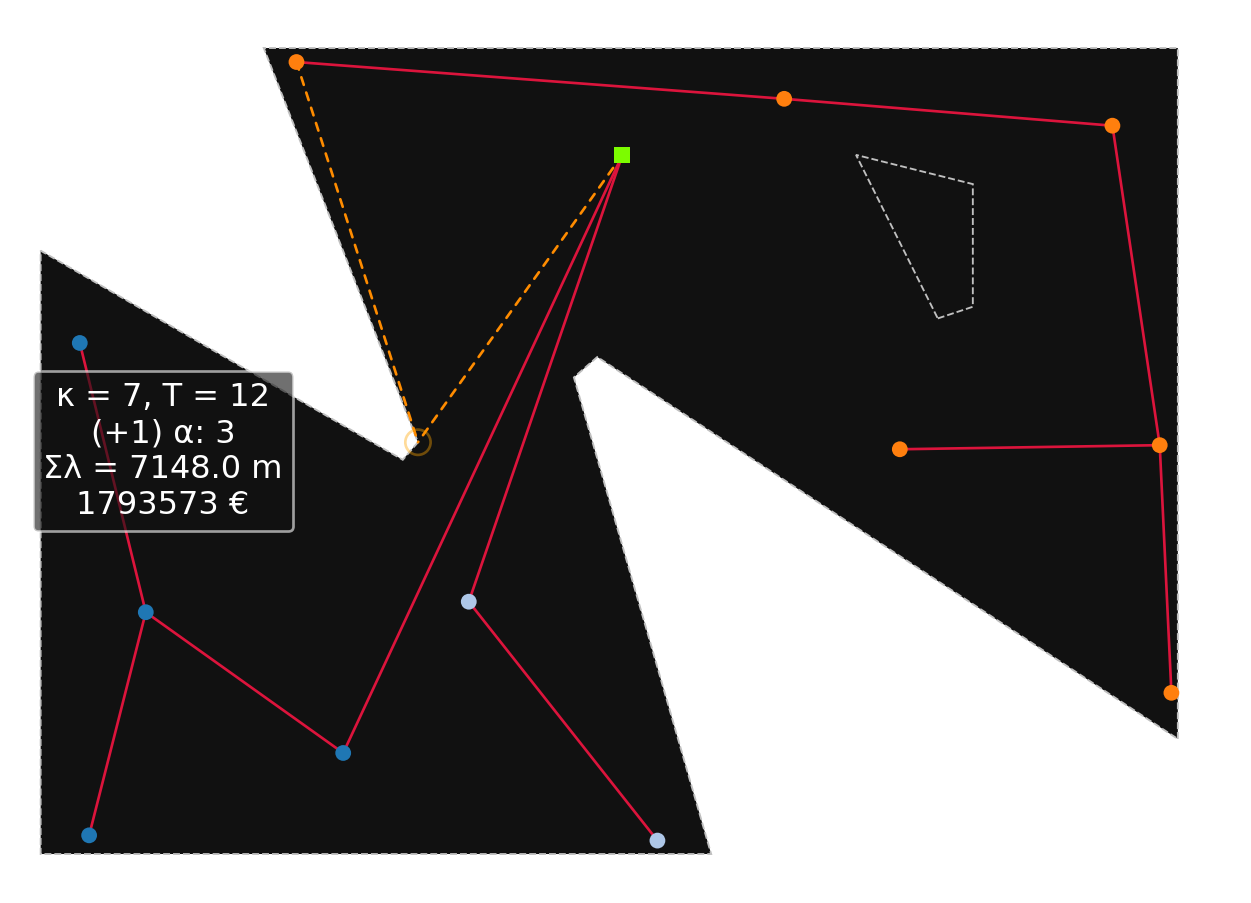

In [227]:
# set coordinate in wfn
new_substations = np.array([[1000, 1200],], dtype=float)
wfn.set_coordinates(turbines=turbines, substations=new_substations)
wfn.plot()


S, G_tentative, and G got updated!


<Axes: >

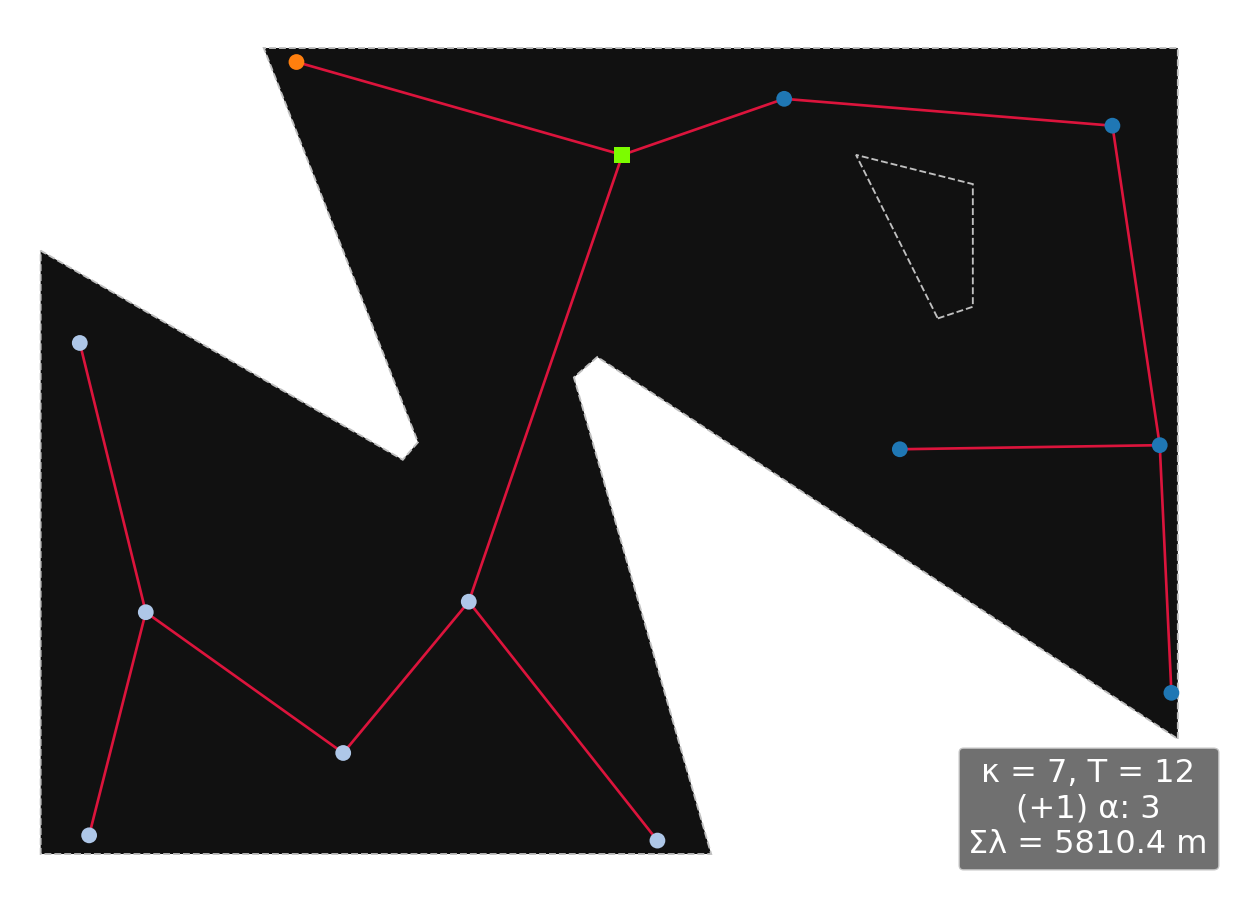

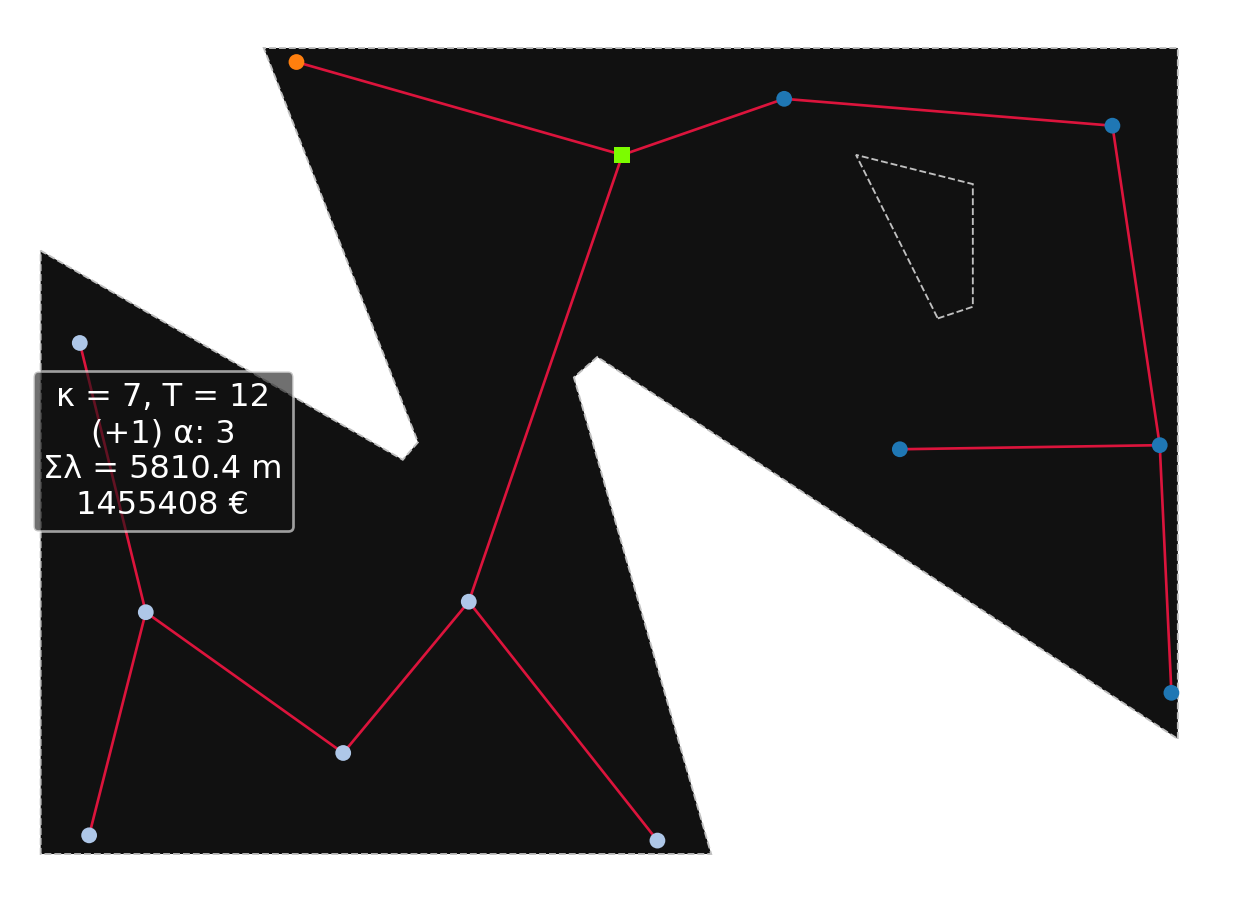

In [228]:
# Re-run optimizer with new coordinates
router()

wfn.plot_G_tentative()
wfn.plot()

[(3, 4, {'length': 563.8794197343967, 'load': 4, 'reverse': True, 'cable': 1, 'cost': 161833.39346377185}), (3, 1, {'length': 552.9647366695276, 'load': 3, 'reverse': True, 'cable': 0, 'cost': 113910.7357539227}), (-1, 4, {'length': 293.1637767528587, 'load': 5, 'reverse': False, 'cable': 1, 'cost': 84138.00392807045}), (-1, 6, {'length': 808.9462281264435, 'load': 6, 'reverse': False, 'cable': 2, 'cost': 328432.1686193361}), (-1, 5, {'length': 580.2111684550721, 'load': 1, 'reverse': False, 'cable': 0, 'cost': 119523.50070174485}), (0, 1, {'length': 424.471436023674, 'load': 1, 'reverse': True, 'cable': 0, 'cost': 87441.11582087685}), (2, 1, {'length': 445.05505277437305, 'load': 1, 'reverse': False, 'cable': 0, 'cost': 91681.34087152085}), (8, 10, {'length': 415.12046444375636, 'load': 3, 'reverse': False, 'cable': 0, 'cost': 85514.8156754138}), (8, 6, {'length': 336.60956611480907, 'load': 4, 'reverse': False, 'cable': 1, 'cost': 96606.9454749502}), (9, 10, {'length': 394.1230772233

<Axes: >

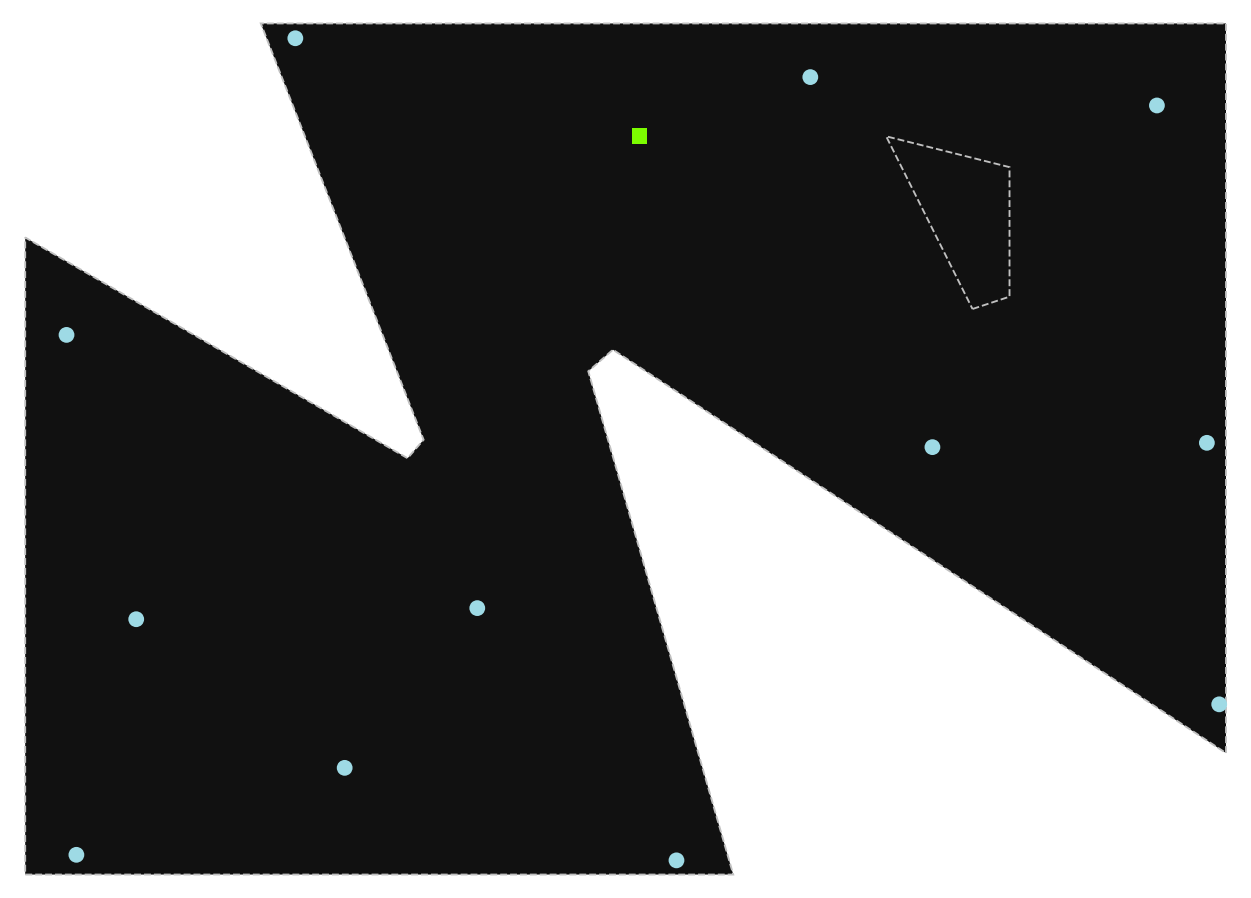

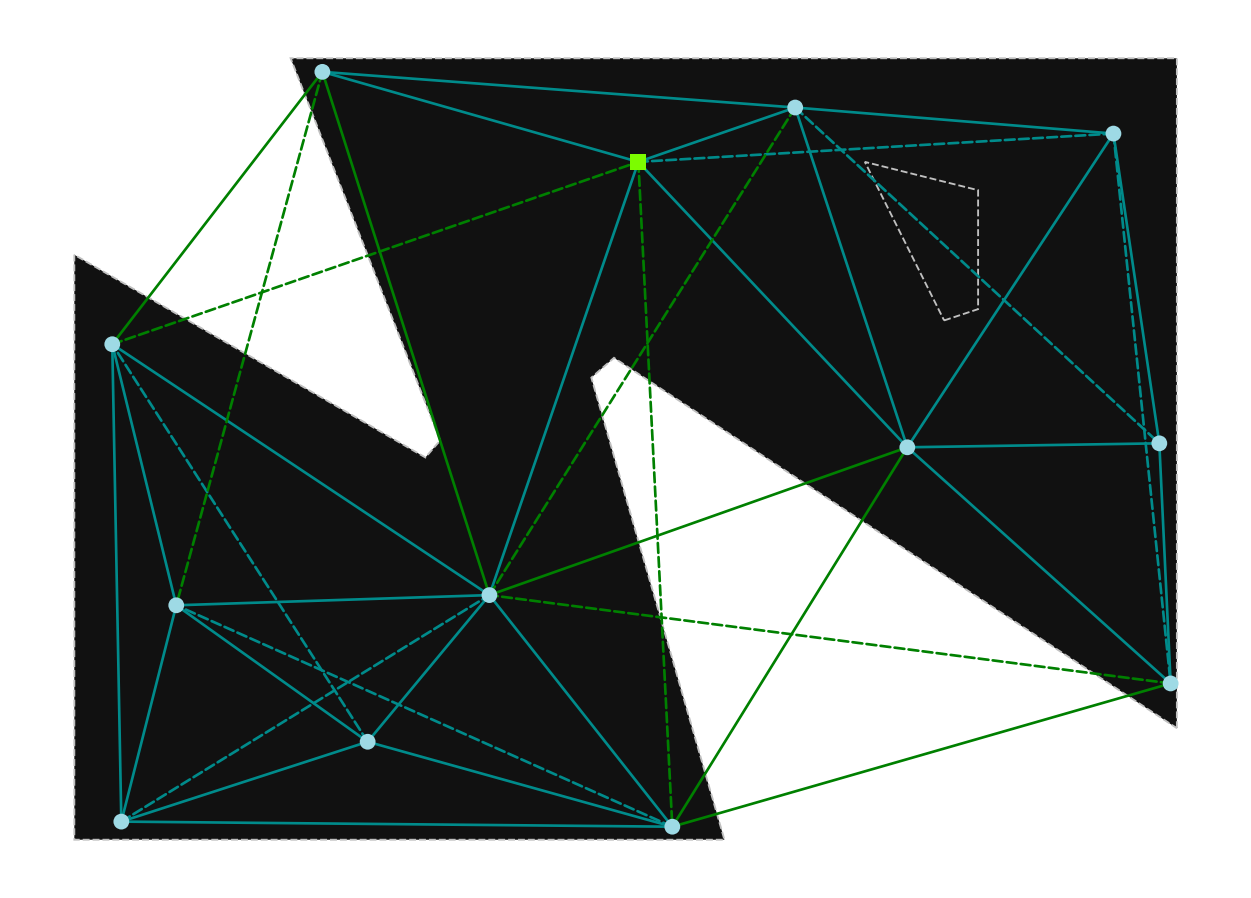

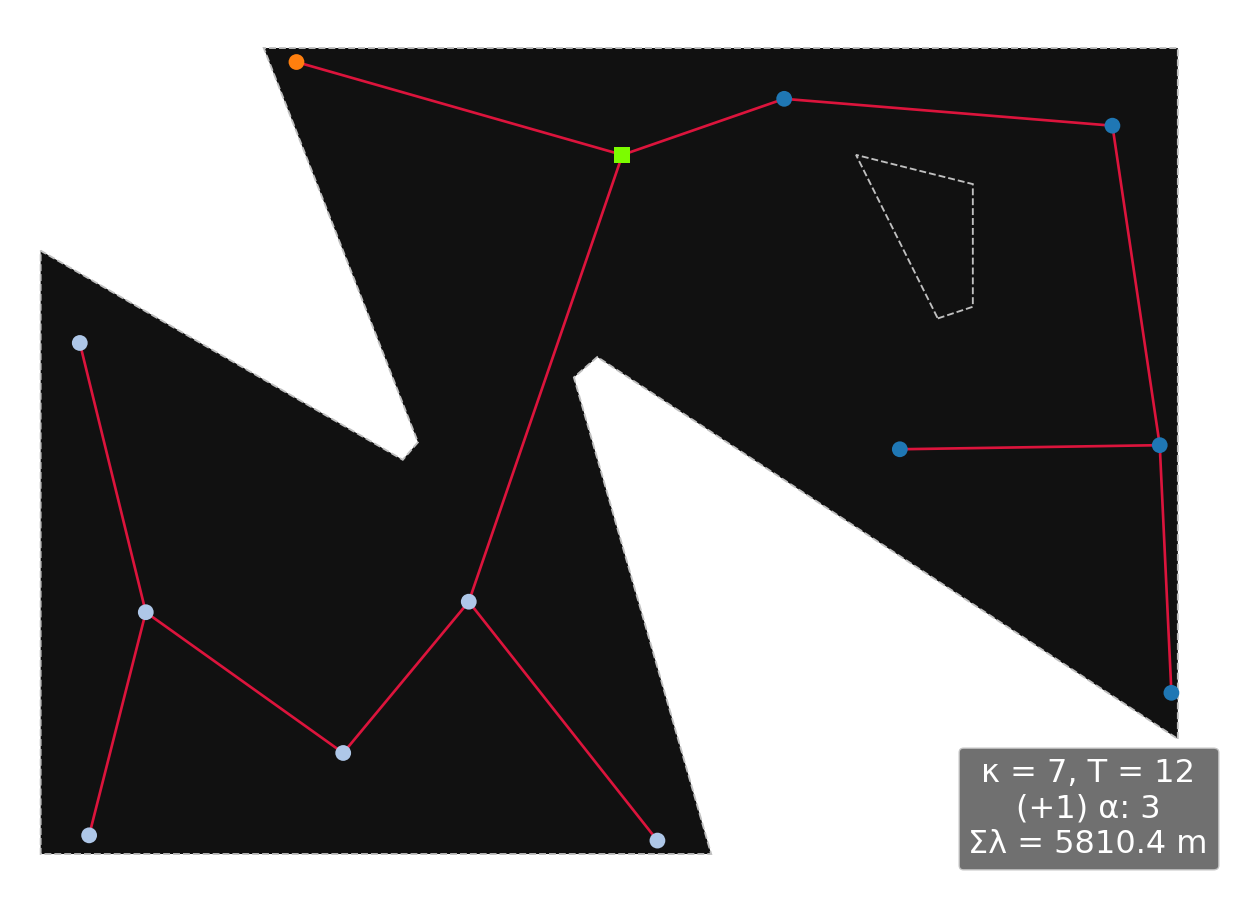

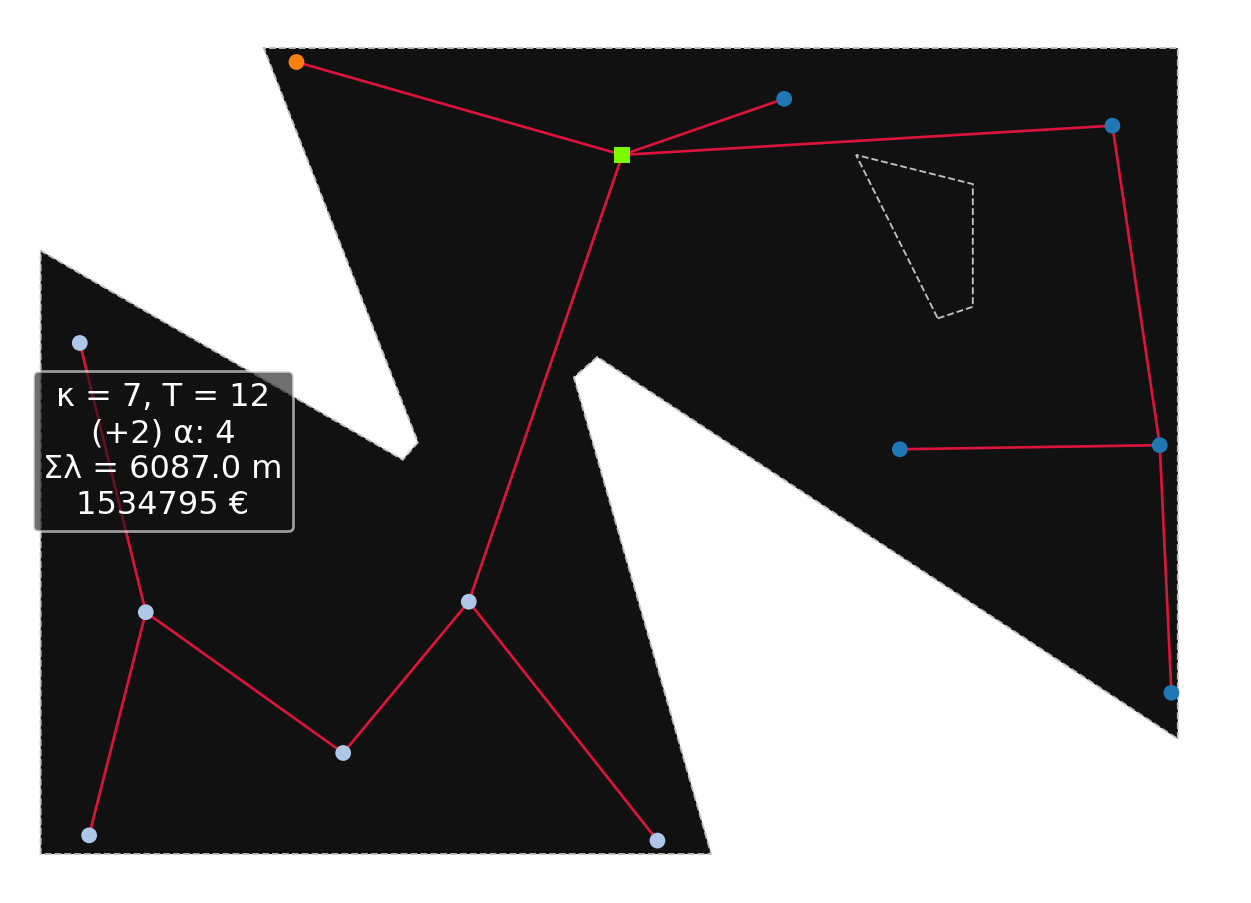

In [ ]:
# set network in wfn
net = wfn.get_network()
print(net)  # Check structure

# Convert tuples to lists
net = [list(edge) for edge in net]  

# Modify the first entry
net[0][1] = -1


# Convert back to tuples before setting the network
net = [tuple(edge) for edge in net]
print(net)
wfn.set_network(network_tree=net)
wfn.plot_L()
wfn.plot_A()
wfn.plot_G_tentative()
wfn.plot()


G_tentative is not updated


<Axes: >

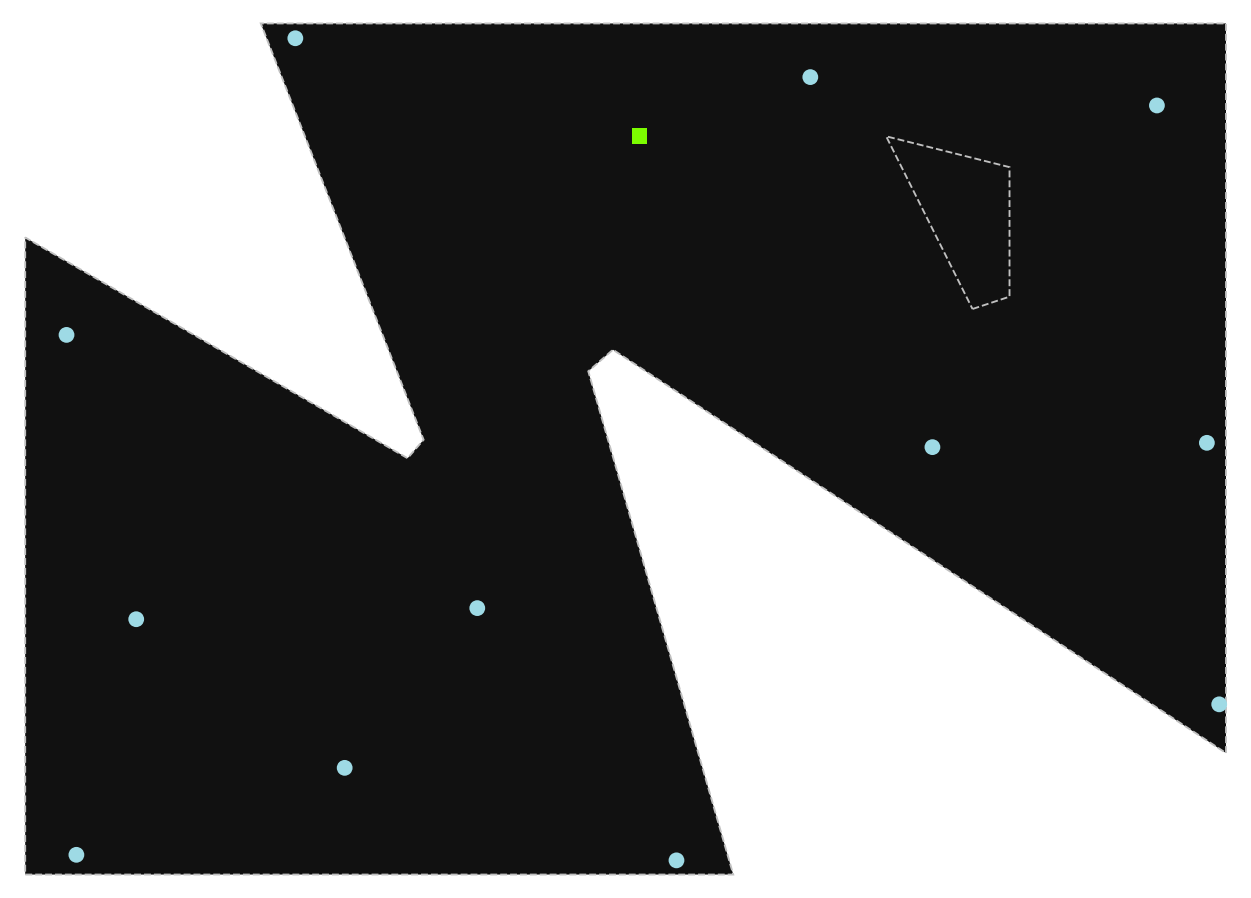

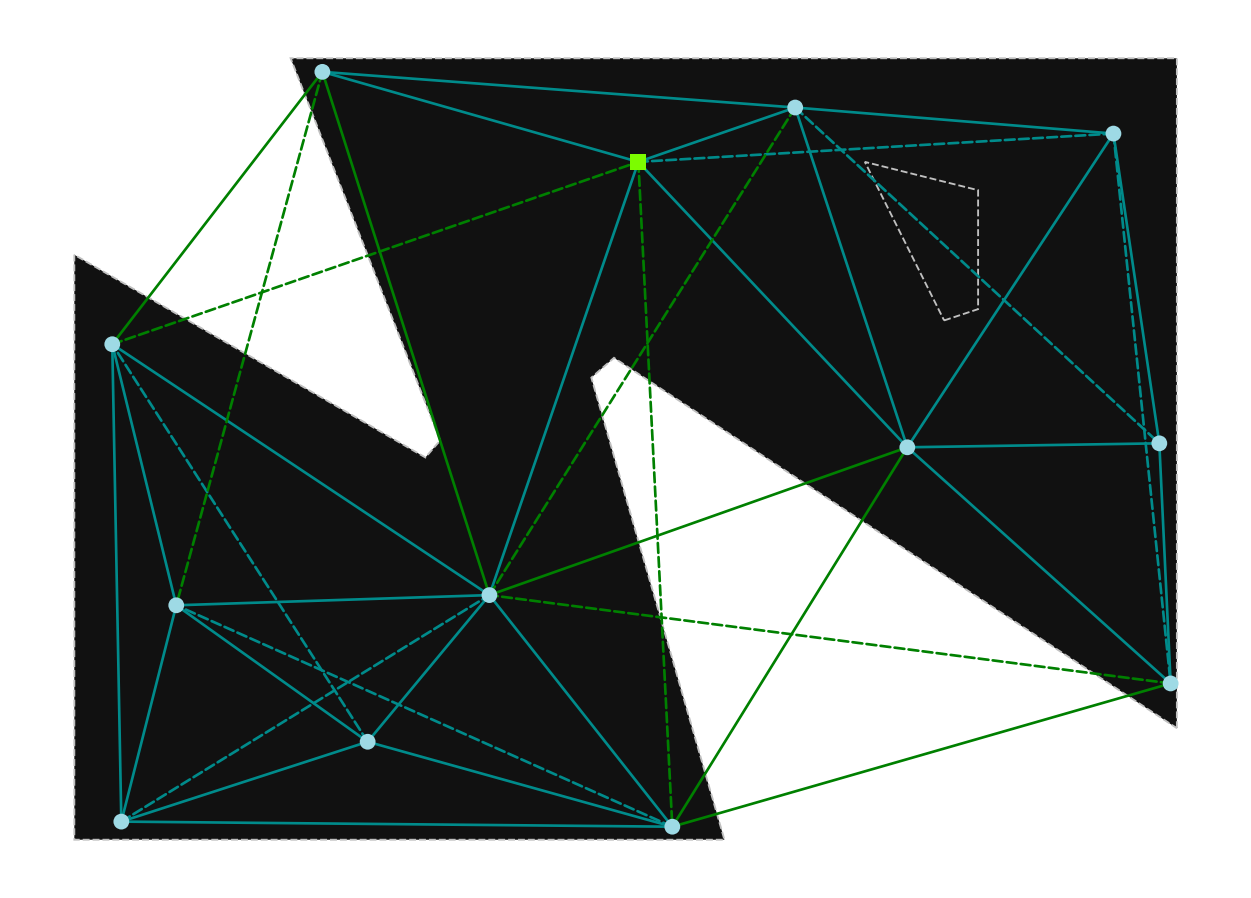

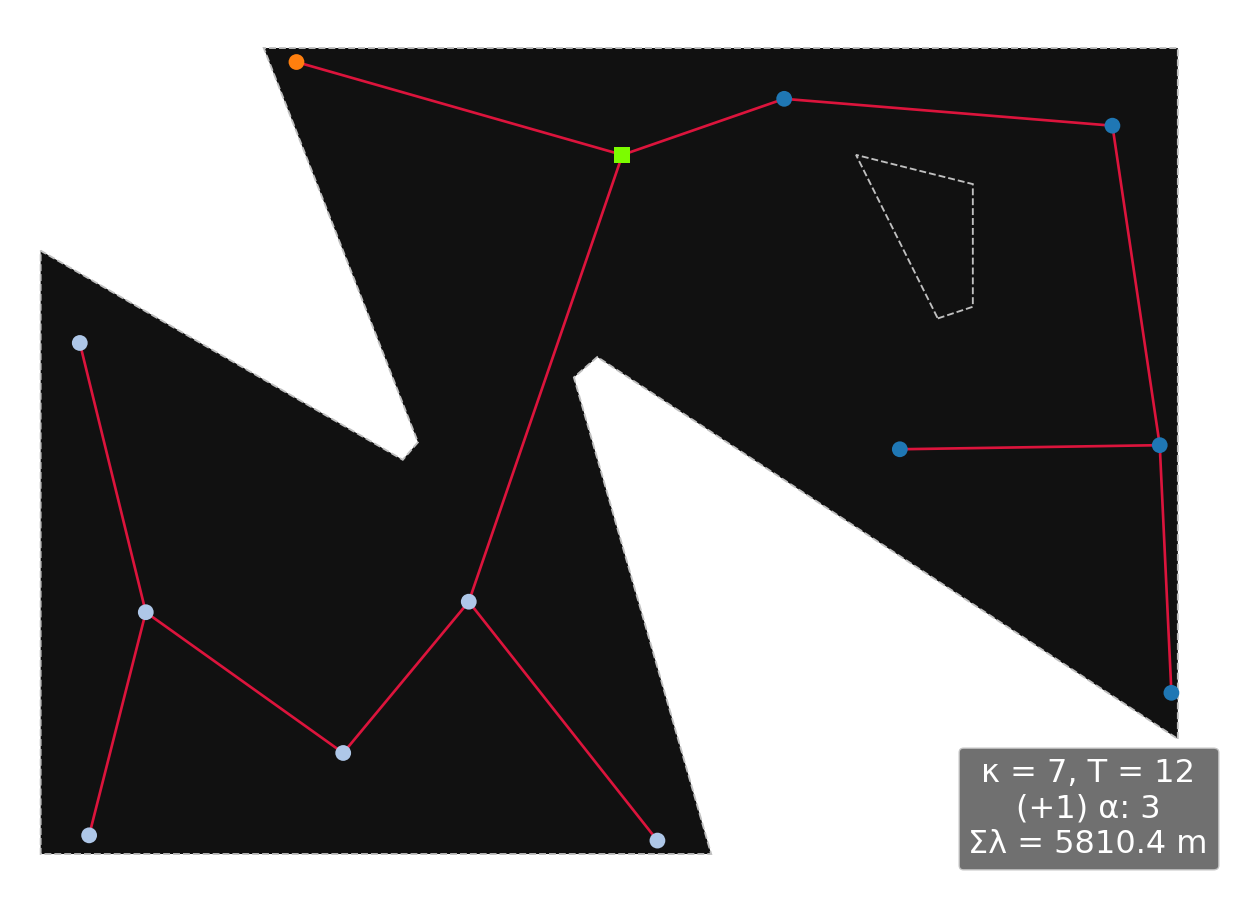

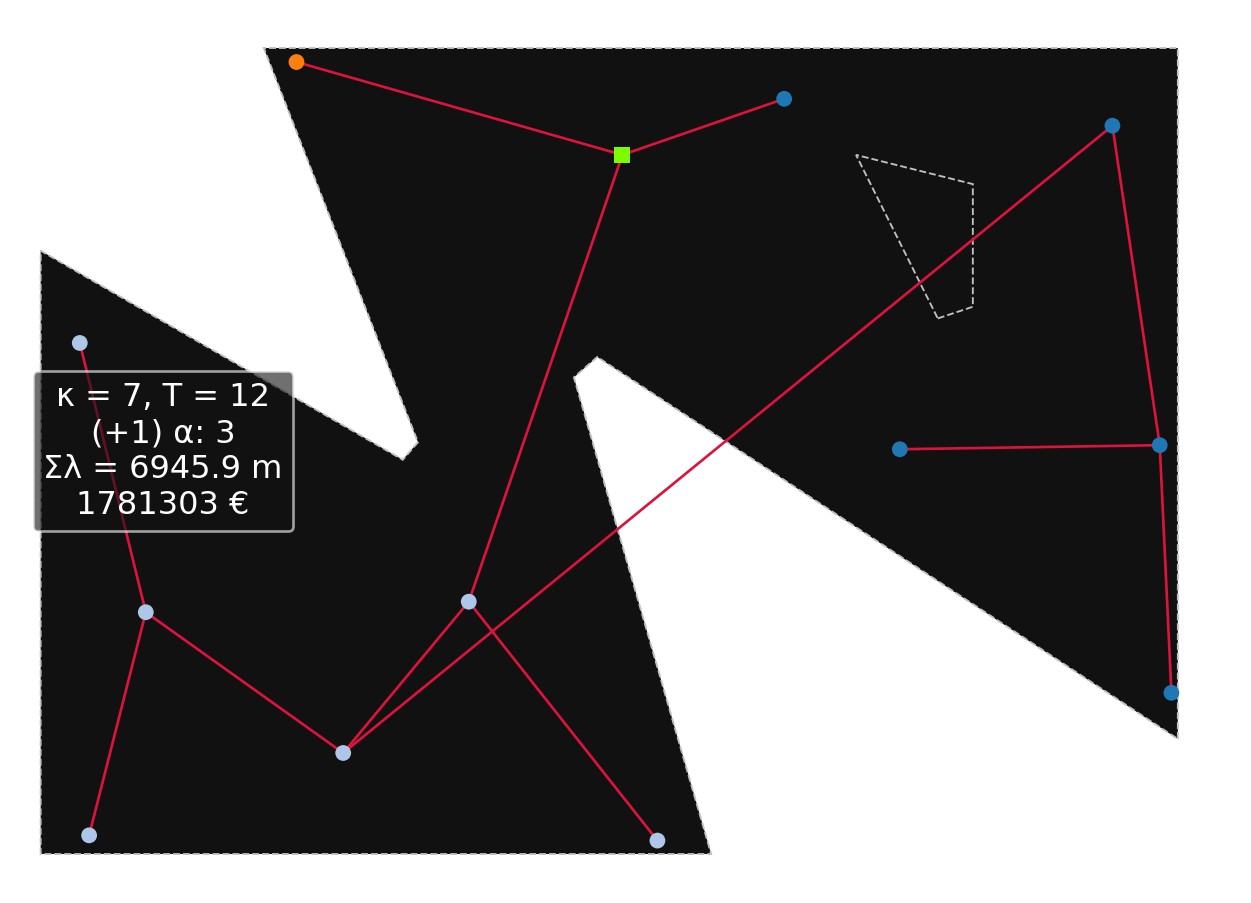

In [ ]:
net_array = np.array([
    [3, 8, 840.488548, 4, 1, 1, 241220.213],
    [3, 1, 552.964737, 3, 1, 0, 113910.736],
    [-1, 4, 293.163777, 5, 0, 1, 84138.0039],
    [-1, 6, 808.946228, 6, 0, 2, 328432.169],
    [-1, 5, 580.211168, 1, 0, 0, 119523.501],
    [0, 1, 424.471436, 1, 1, 0, 87441.1158],
    [2, 1, 445.055053, 1, 0, 0, 91681.3409],
    [8, 10, 415.120464, 3, 0, 0, 85514.8157],
    [8, 6, 336.609566, 4, 0, 1, 96606.9455],
    [9, 10, 394.123077, 1, 1, 0, 81189.3539],
    [11, 10, 474.647237, 1, 0, 0, 97777.3309],
    [6, 7, 521.162163, 1, 0, 0, 107359.406]
], dtype=float)

# numpy record array type for each column

wfn.set_network_array(network_array=net_array)
wfn.plot_L()
wfn.plot_A()
wfn.plot_G_tentative()
wfn.plot()

the optimizer is not run since a network_array is given
G_tentative is not updated


<Axes: >

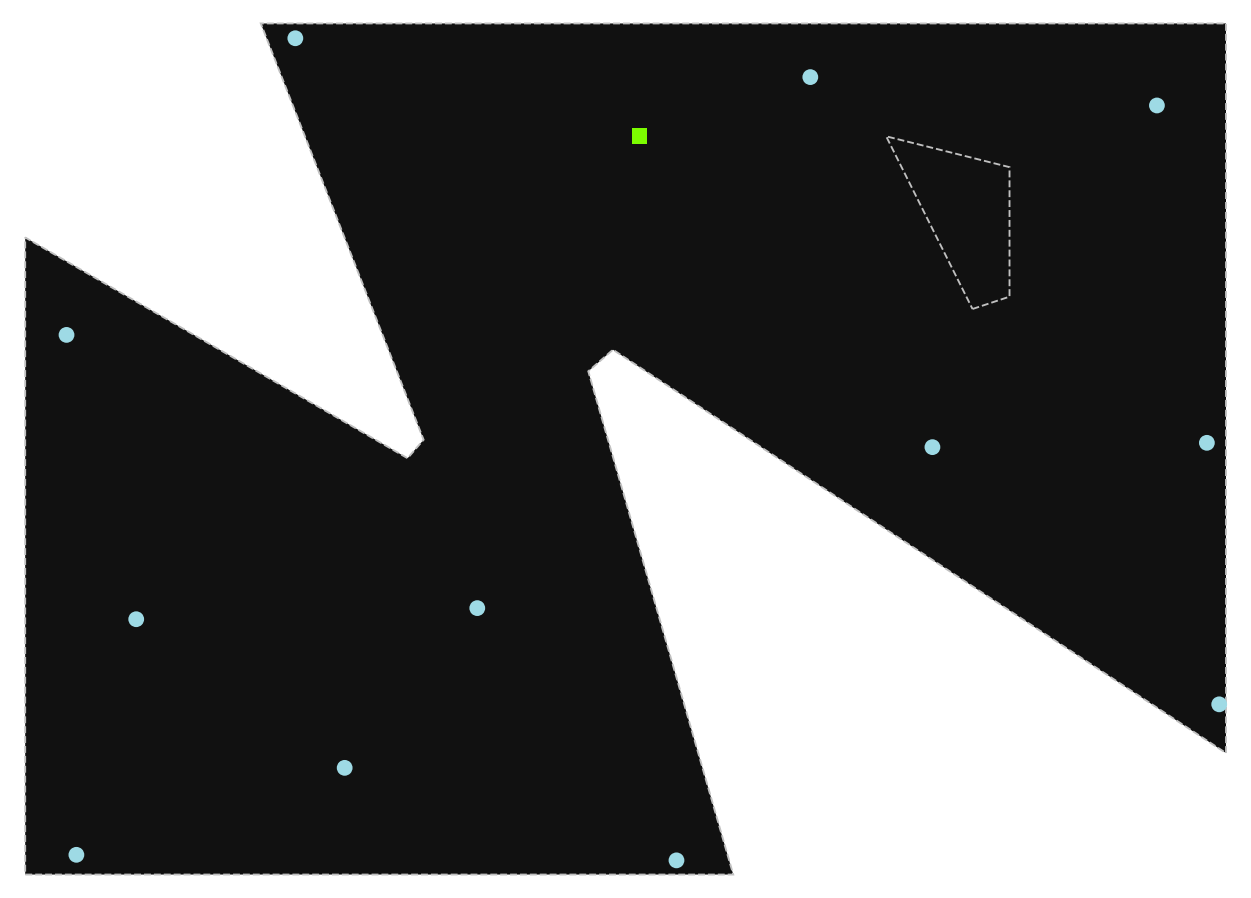

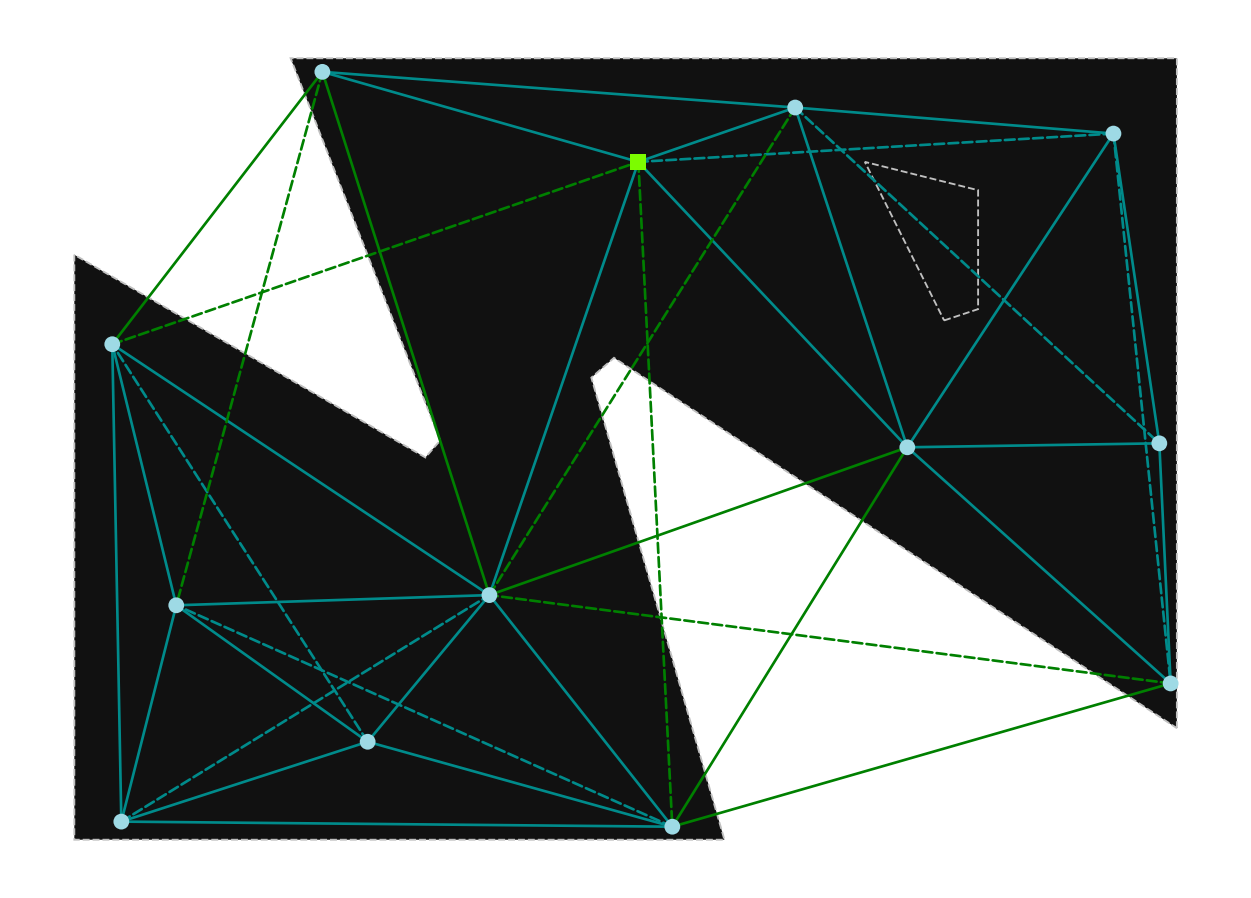

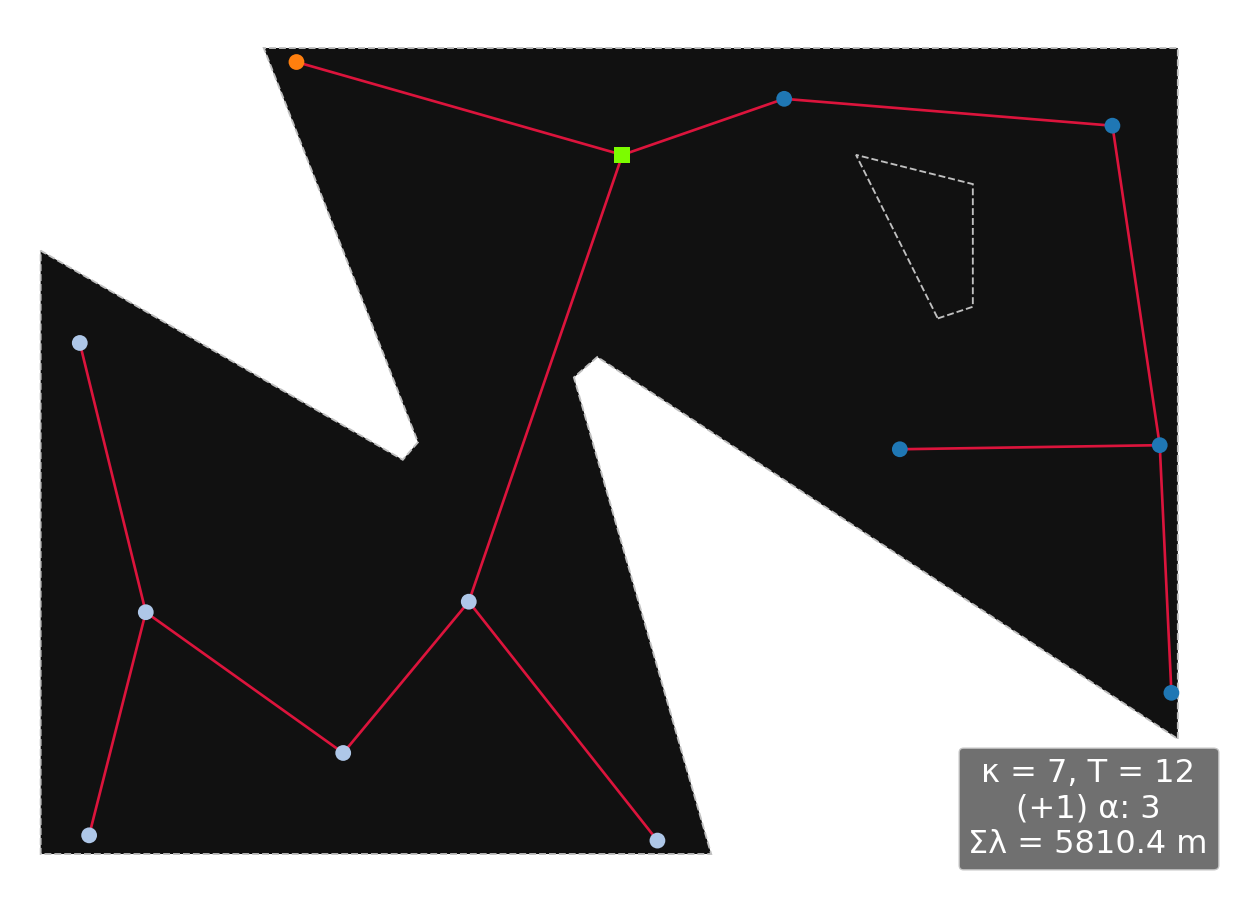

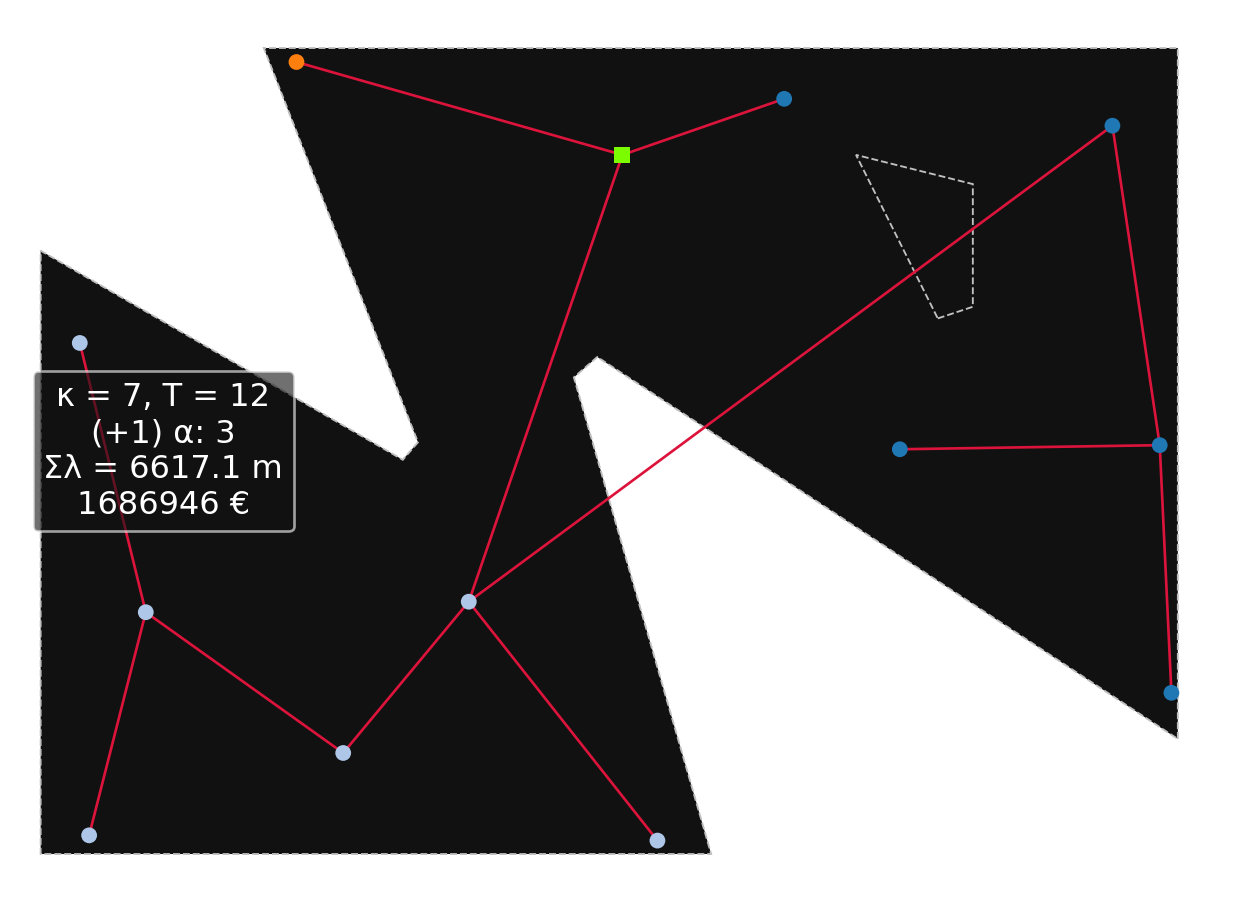

In [231]:
net_array = np.array([
    [3, 6, 840.488548, 4, 1, 1, 241220.213],
    [3, 1, 552.964737, 3, 1, 0, 113910.736],
    [-1, 4, 293.163777, 5, 0, 1, 84138.0039],
    [-1, 6, 808.946228, 6, 0, 2, 328432.169],
    [-1, 5, 580.211168, 1, 0, 0, 119523.501],
    [0, 1, 424.471436, 1, 1, 0, 87441.1158],
    [2, 1, 445.055053, 1, 0, 0, 91681.3409],
    [8, 10, 415.120464, 3, 0, 0, 85514.8157],
    [8, 6, 336.609566, 4, 0, 1, 96606.9455],
    [9, 10, 394.123077, 1, 1, 0, 81189.3539],
    [11, 10, 474.647237, 1, 0, 0, 97777.3309],
    [6, 7, 521.162163, 1, 0, 0, 107359.406]
], dtype=float)

router(network_array=net_array)
wfn.plot_L()
wfn.plot_A()
wfn.plot_G_tentative()
wfn.plot()

In [232]:
# gradient
grad_wt, grad_ss = router.gradient()
print('gradients_wt:\n', grad_wt)
print('gradients_ss:\n', grad_ss)
print()
print('cost: ', wfn.cost())

[(3, 6, {'length': np.float64(1370.6308766403886), 'load': 4, 'reverse': True, 'cable': 1, 'cost': np.float64(393371.06159579154)}), (3, 1, {'length': np.float64(552.9647366695276), 'load': 3, 'reverse': True, 'cable': 0, 'cost': np.float64(113910.7357539227)}), (-1, 4, {'length': np.float64(293.1637767528587), 'load': 5, 'reverse': False, 'cable': 1, 'cost': np.float64(84138.00392807045)}), (-1, 6, {'length': np.float64(808.9462281264435), 'load': 6, 'reverse': False, 'cable': 2, 'cost': np.float64(328432.1686193361)}), (-1, 5, {'length': np.float64(580.2111684550721), 'load': 1, 'reverse': False, 'cable': 0, 'cost': np.float64(119523.50070174485)}), (0, 1, {'length': np.float64(424.471436023674), 'load': 1, 'reverse': True, 'cable': 0, 'cost': np.float64(87441.11582087685)}), (2, 1, {'length': np.float64(445.05505277437305), 'load': 1, 'reverse': False, 'cable': 0, 'cost': np.float64(91681.34087152085)}), (8, 10, {'length': np.float64(415.12046444375636), 'load': 3, 'reverse': False,

In [233]:
# update coordinates from router
new_substations = np.array([[600, 600],], dtype=float)
router(turbines=turbines, substations=new_substations)
# shall I make it work with only modified coordintates?

S, G_tentative, and G got updated!


G_tentative is not updated


<Axes: >

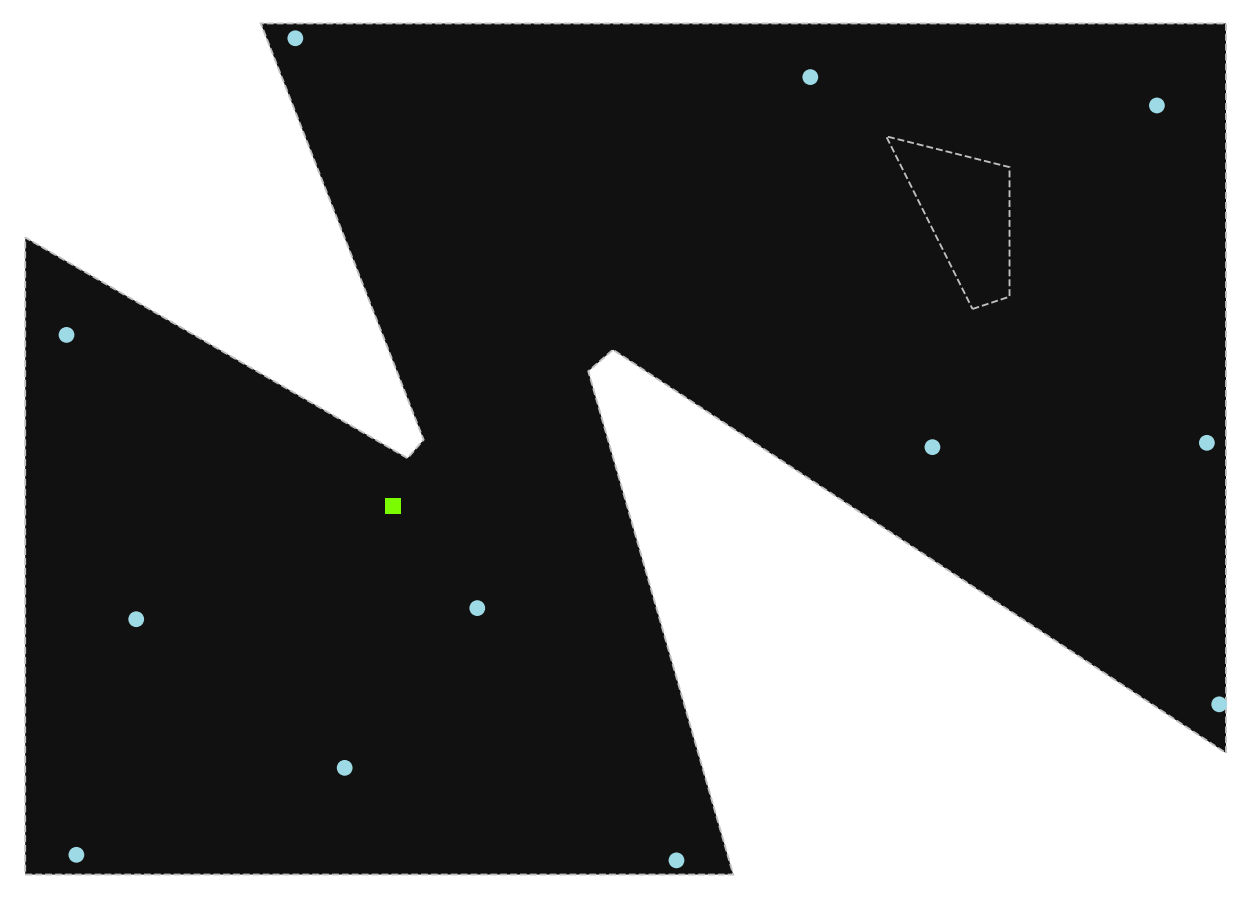

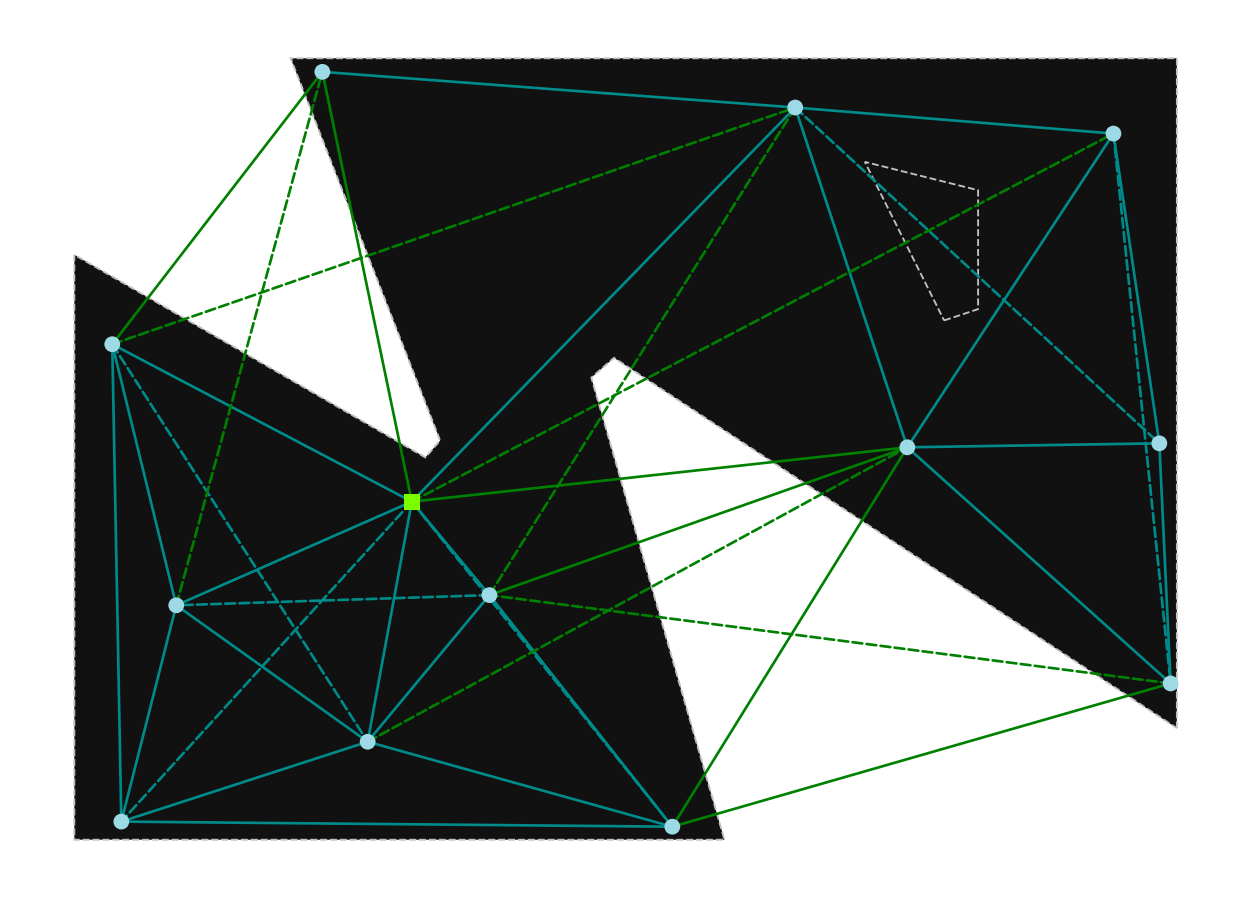

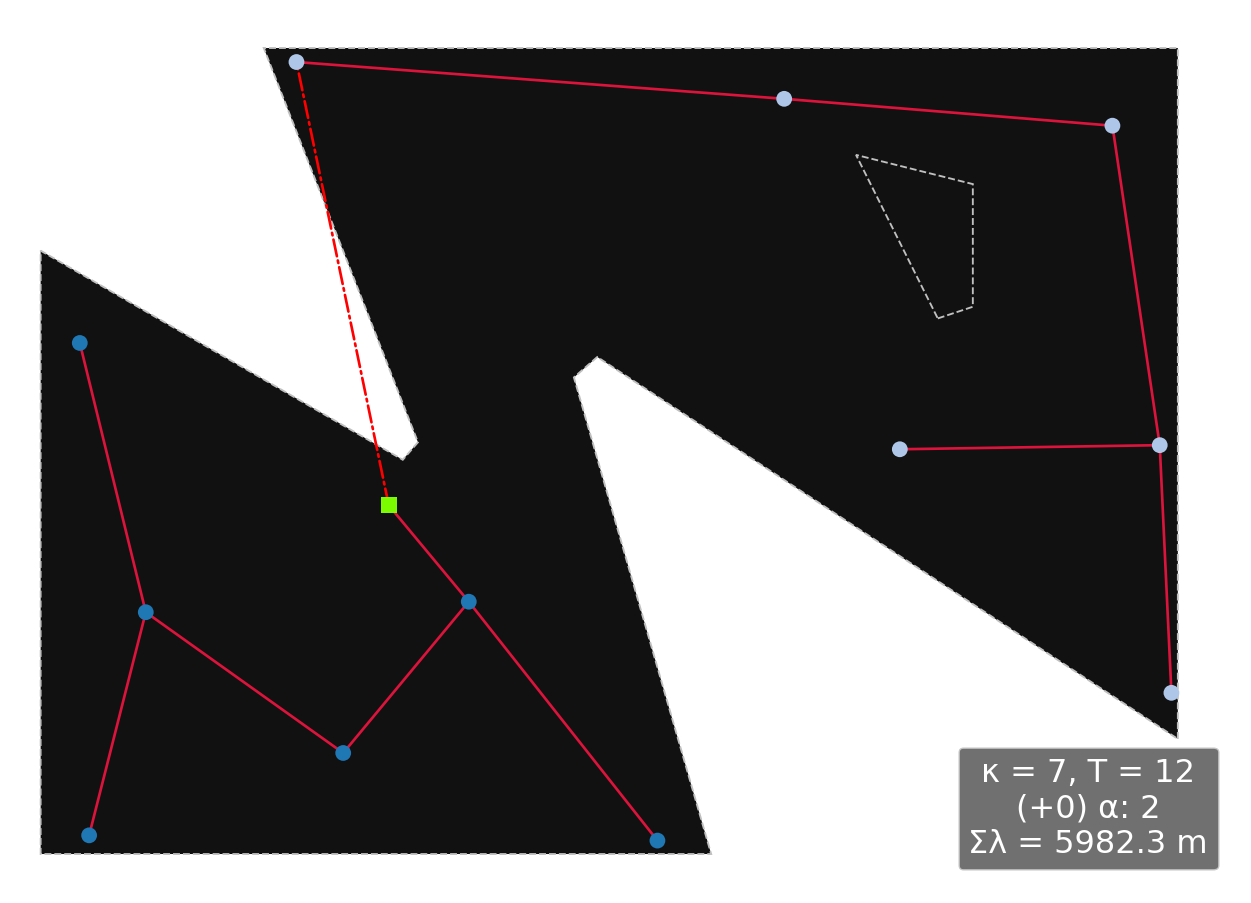

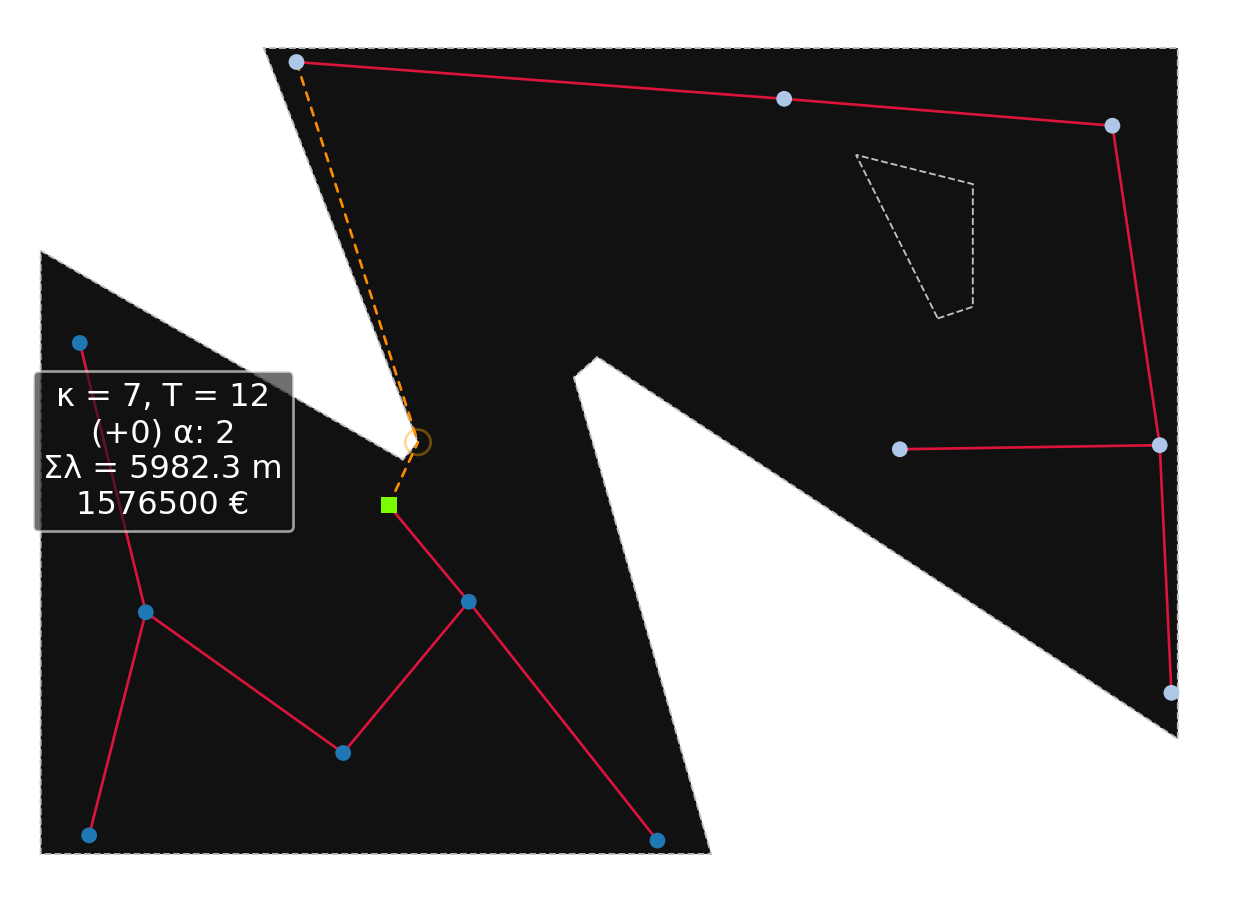

In [234]:
wfn.plot_L()
wfn.plot_A()
wfn.plot_G_tentative()
wfn.plot()

In [235]:
# gradient with new substation
grad_wt, grad_ss = router.gradient()
print('gradients_wt:\n', grad_wt)
print('gradients_ss:\n', grad_ss)
print()
print('cost: ', wfn.cost())

[(11, 10, {'length': 474.6472374300729, 'load': 1, 'reverse': False, 'cable': 0, 'cost': 97777.33091059502}), (-1, 6, {'length': 214.46211786700232, 'load': 6, 'reverse': False, 'cable': 2, 'cost': 87071.61985400294}), (-1, 26, {'load': 6, 'length': 119.01260437449471, 'kind': 'detour', 'reverse': False, 'cable': 2, 'cost': 48319.11737604485}), (8, 10, {'length': 415.12046444375636, 'load': 3, 'reverse': False, 'cable': 0, 'cost': 85514.8156754138}), (8, 6, {'length': 336.60956611480907, 'load': 4, 'reverse': False, 'cable': 1, 'cost': 96606.9454749502}), (3, 4, {'length': 563.8794197343967, 'load': 4, 'reverse': True, 'cable': 1, 'cost': 161833.39346377185}), (3, 1, {'length': 552.9647366695276, 'load': 3, 'reverse': True, 'cable': 0, 'cost': 113910.7357539227}), (4, 5, {'length': 837.37327399434, 'load': 5, 'reverse': True, 'cable': 1, 'cost': 240326.12963637558}), (0, 1, {'length': 424.471436023674, 'load': 1, 'reverse': True, 'cable': 0, 'cost': 87441.11582087685}), (2, 1, {'length

In [240]:
New_network = [(1, 1, {'length': np.float64(474.6472374300729), 'load': 1, 'reverse': False, 'cable': 0, 'cost': np.float64(97777.33091059502)}),
               (1, 1, {'length': np.float64(627.251943002172), 'load': 5, 'reverse': False, 'cable': 1, 'cost': np.float64(180021.30764162337)}),
               (1, 1, {'length': np.float64(616.1120028046848), 'load': 6, 'reverse': False, 'cable': 2, 'cost': np.float64(250141.47313870204)}),
               (1, 1, {'length': np.float64(402.54813376787627), 'load': 1, 'reverse': False, 'cable': 0, 'cost': np.float64(82924.91555618252)}),
               (1, 1, {'length': np.float64(563.8794197343967), 'load': 4, 'reverse': True, 'cable': 1, 'cost': np.float64(161833.39346377185)}),
               (1, 1, {'length': np.float64(552.9647366695276), 'load': 3, 'reverse': True, 'cable': 0, 'cost': np.float64(113910.7357539227)}),
               (1, 1, {'length': np.float64(424.471436023674), 'load': 1, 'reverse': True, 'cable': 0, 'cost': np.float64(87441.11582087685)}),
               (1, 1, {'length': np.float64(445.05505277437305), 'load': 1, 'reverse': False, 'cable': 0, 'cost': np.float64(91681.34087152085)}),
               (1, 1, {'length': np.float64(415.12046444375636), 'load': 3, 'reverse': False, 'cable': 0, 'cost': np.float64(85514.8156754138)}),
               (1, 1, {'length': np.float64(336.60956611480907), 'load': 4, 'reverse': False, 'cable': 1, 'cost': np.float64(96606.9454749502)}),
               (1, 1, {'length': np.float64(394.12307722334657), 'load': 1, 'reverse': True, 'cable': 0, 'cost': np.float64(81189.35390800939)}),
               (1, 1, {'length': np.float64(521.1621628629615), 'load': 1, 'reverse': False, 'cable': 0, 'cost': np.float64(107359.40554977008)})]
#wfn.G.edges()
#wfn.set_network(network_tree=New_network)
#wfn.plot()
grad_wt, grad_ss = router.gradient(network_tree=New_network)



[(1, 1, {'length': np.float64(0.0), 'load': 1, 'reverse': False, 'cable': 0, 'cost': np.float64(0.0)})]


In [241]:
print('gradients_wt\n', grad_wt)
print('gradients_ss\n', grad_ss)
print()
print('cost: ', wfn.cost())


gradients_wt
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
gradients_ss
 [[0. 0.]]

cost:  0.0


In [245]:
# MILP
wfn2 = WindFarmNetwork(turbines=turbines, substations=substations, border=border, obstacles=obstacles, cables=cables)
router2 = MILP(wfn=wfn2) # default is EW
router2()
grad_wt, grad_ss = router2.gradient()


Starting CP-SAT solver v9.12.4544
Parameters: max_time_in_seconds: 40 log_search_progress: true relative_gap_limit: 0.005 num_workers: 8

Initial optimization model '': (model_fingerprint: 0xe00b0b13f9f4eb8)
#Variables: 156 (#bools: 45 in floating point objective)
  - 111 Booleans in [0,1]
  - 33 in [-6,6]
  - 12 in [0,7]
#kAtMostOne: 25 (#literals: 104)
#kLinear1: 222 (#enforced: 222)
#kLinearN: 15 (#terms: 147)

Starting presolve at 0.00s
[Scaling] Floating point objective has 45 terms with magnitude in [336.61, 1997.76] average = 885.508
[Scaling] Objective coefficient relative error: 2.15367e-08
[Scaling] Objective worst-case absolute error: 8.53302e-05
[Scaling] Objective scaling factor: 65536
  6.93e-05s  0.00e+00d  [DetectDominanceRelations] 
  1.46e-03s  0.00e+00d  [operations_research::sat::CpModelPresolver::PresolveToFixPoint] #num_loops=2 #num_dual_strengthening=1 
  1.45e-05s  0.00e+00d  [operations_research::sat::CpModelPresolver::ExtractEncodingFromLinear] #potential_sup

In [246]:
print('gradients_wt\n', grad_wt)
print('gradients_ss\n', grad_ss)
print()
print('cost: ', wfn.cost())

gradients_wt
 [[   0.            0.        ]
 [ 196.26832901  209.01125624]
 [   0.            0.        ]
 [ -30.17552277  203.777913  ]
 [-286.0434241    23.41280695]
 [   0.            0.        ]
 [  55.64091546  382.49415485]
 [   0.            0.        ]
 [   0.            0.        ]
 [   0.            0.        ]
 [ -67.98698916  119.1807082 ]
 [   0.            0.        ]]
gradients_ss
 [[-156.3601524   134.58190589]]

cost:  1463760.6045743155


<Axes: >

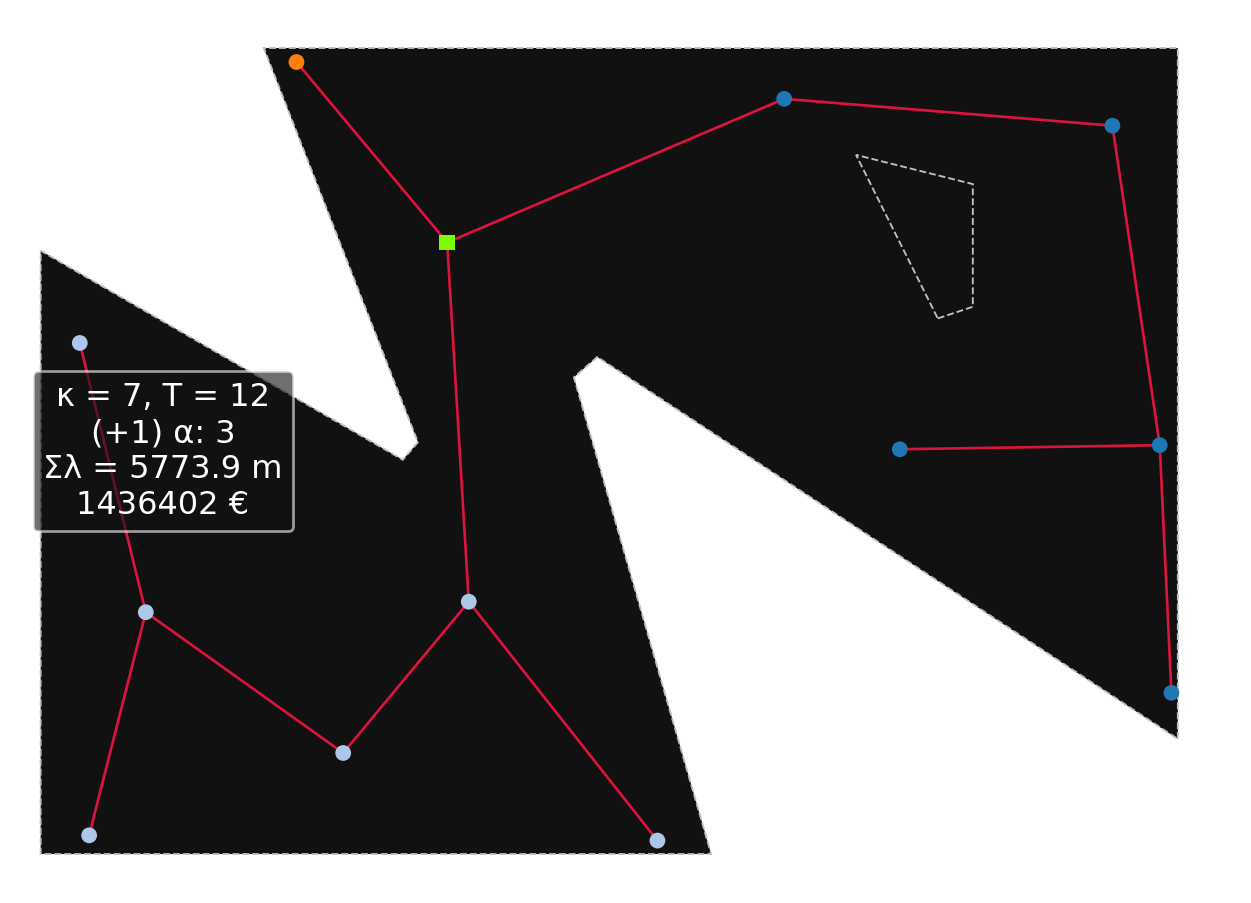

In [247]:
wfn2.plot()

In [248]:
wfn3 = WindFarmNetwork.from_yaml(filepath="C:/code/OptiWindNet/docs/notebooks/data/example_location.yaml")

In [250]:
wfn4 = WindFarmNetwork.from_windIO(filepath="C:/code/OptiWindNet/docs/notebooks/data/IEA37_Borssele_Regular_System.yaml")